In [337]:
!which python

/home/corona2021/anaconda3/envs/p4ds-env/bin/python


In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [339]:
df = pd.read_csv("Covid_data.csv",thousands=',',skipinitialspace=True)
df.head()

,Unnamed: 0,country,continent,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious,cases/1M_pop,deaths/1M_pop,total_tests,tests/1M_pop,population,Date
0,0,China,Asia,82995,2.0,4634.0,NaN,78288.0,73.0,4.0,58.0,3.0,NaN,NaN,1.439324e+09,2020-05-28
1,1,USA,North America,1768461,22658.0,103330.0,1223.0,498725.0,1166406.0,17202.0,5346.0,312.0,16331312.0,49365.0,3.308276e+08,2020-05-28
2,2,Brazil,South America,438812,24151.0,26764.0,1067.0,193181.0,218867.0,8318.0,2066.0,126.0,871839.0,4104.0,2.124222e+08,2020-05-28
3,3,Russia,Europe,379051,8371.0,4142.0,174.0,150993.0,223916.0,2300.0,2598.0,28.0,9701280.0,66479.0,1.459290e+08,2020-05-28
4,4,Spain,Europe,284986,1137.0,27119.0,1.0,196958.0,60909.0,854.0,6096.0,580.0,3556567.0,76071.0,4.675320e+07,2020-05-28


Xóa đi cột Unnamed:0 vì đây là cột index nên không có  ý nghĩa

In [340]:
df.drop("Unnamed: 0",axis = 1,inplace = True)

## I. Khám phá dữ liệu

### 1. Dữ liệu có bao nhiêu hàng và cột

In [341]:
df.shape

(5375, 15)

#### Ý nghĩa của các trường dữ liệu
* Country : Tên các quốc gia có trong tập dataset
* Continent : Châu lục tương ứng của từng quốc gia
* total_cases : tổng số ca nhiễm virus tính đến thời điểm ngày đang xét
* new_cases : Số ca nhiễm mới của ngày hôm đó
* total_deaths : Tổng số người chết tính đến thời điểm ngày đang xét
* new_deaths : Số người chết mới ngày hôm đó
* total_recovered : Tổng số người đã hồi phục tới thời điểm đang xét
* active_cases : Những ca vẫn còn nhiễm bệnh
* serious : Những ca bệnh nghiêm trọng 
* cases/1M_pop: Số ca nhiễm trung bình trên 1 triệu người 
* deaths/1M_pop: Số người chết trung bình trên 1 triệu người
* total_tests : Tổng số test được thực hiện 
* tests/1M_pop: Số test trung bình trên 1 triệu người
* population : Tổng số dân của đất nước đó
* Date : Ngày tháng năm đang xét (Dữ liệu bao gồm từ ngày 28/5/2021 -> 21/6/2021)

### 2. Tạo thêm DataFrame theo châu lục để thêm các insight  cho phân tích 

Đây là data sau khi group by theo các continent

In [342]:
df1 = df[df['Date']=='2020-05-28']
df1.head()

,country,continent,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious,cases/1M_pop,deaths/1M_pop,total_tests,tests/1M_pop,population,Date
0,China,Asia,82995,2.0,4634.0,NaN,78288.0,73.0,4.0,58.0,3.0,NaN,NaN,1.439324e+09,2020-05-28
1,USA,North America,1768461,22658.0,103330.0,1223.0,498725.0,1166406.0,17202.0,5346.0,312.0,16331312.0,49365.0,3.308276e+08,2020-05-28
2,Brazil,South America,438812,24151.0,26764.0,1067.0,193181.0,218867.0,8318.0,2066.0,126.0,871839.0,4104.0,2.124222e+08,2020-05-28
3,Russia,Europe,379051,8371.0,4142.0,174.0,150993.0,223916.0,2300.0,2598.0,28.0,9701280.0,66479.0,1.459290e+08,2020-05-28
4,Spain,Europe,284986,1137.0,27119.0,1.0,196958.0,60909.0,854.0,6096.0,580.0,3556567.0,76071.0,4.675320e+07,2020-05-28


In [343]:
frame= df1.groupby('continent').sum()
frame

,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious,cases/1M_pop,deaths/1M_pop,total_tests,tests/1M_pop,population
continent,,,,,,,,,,,,
Africa,131587,4949.0,3814.0,104.0,55126.0,72647.0,352.0,19143.9,297.27,2054822.0,231813.0,1.337357e+09
Asia,1051266,25111.0,29120.0,439.0,621744.0,400402.0,13699.0,59213.0,437.50,17478141.0,1165686.0,4.606618e+09
Australia/Oceania,8759,12.0,125.0,1.0,8155.0,479.0,5.0,883.9,8.00,1654389.0,147743.0,4.086680e+07
Europe,1969899,19816.0,171568.0,937.0,947902.0,579092.0,9377.0,147229.0,8227.00,34848626.0,2596496.0,7.475916e+08
North America,1981187,28561.0,120174.0,1828.0,622301.0,1238712.0,19461.0,29835.0,1776.00,18611722.0,638607.0,5.886820e+08
Other,721,0.0,15.0,0.0,651.0,55.0,4.0,0.0,0.00,0.0,0.0,0.000000e+00
South America,757488,37855.0,36733.0,1303.0,320777.0,399978.0,11077.0,20427.0,563.40,3861775.0,272682.0,4.304311e+08


In [344]:
df_continent = pd.DataFrame(data = frame.values,columns=frame.keys(),index=sorted(df['continent'].unique()))
df_continent.to_csv (r'Continent.csv')

### 3 : Thống kê trung bình , độ lệch chuẩn , min,max và các khoảng phân vị

In [345]:
df1.describe().style.background_gradient(cmap='Reds').format("{:.3f}")

,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious,cases/1M_pop,deaths/1M_pop,total_tests,tests/1M_pop,population
count,215.000,144.000,184.000,88.000,212.000,213.000,130.000,213.000,182.000,189.000,189.000,213.000
mean,27446.079,807.667,1964.940,52.409,12154.038,12635.516,415.192,1299.210,62.138,415394.048,26735.593,36392235.455
std,132136.638,2951.016,9142.332,181.511,45072.449,83227.525,1861.392,2537.606,152.776,1501123.192,41064.897,141495059.299
min,1.000,1.000,1.000,1.000,1.000,0.000,1.000,0.900,0.060,30.000,4.000,801.000
25%,154.000,11.000,9.000,2.000,67.000,25.000,3.000,89.000,3.000,4994.000,2305.000,867776.000
50%,1067.000,74.500,39.000,5.000,609.500,306.000,10.500,271.000,8.000,49966.000,10448.000,6862479.000
75%,8956.000,369.250,280.500,23.000,4687.750,2307.000,89.250,1715.000,41.750,275776.000,30354.000,25472297.000
max,1768461.000,24151.000,103330.000,1223.000,498725.000,1166406.000,17202.000,19749.000,1238.000,16331312.000,213629.000,1439323776.000


##### Nhận xét: 
> Có thể thấy các thuộc tính "total_cases" , "active cases", "total_test" có khoảng giá trị lớn, biến động nhiều.
Hơn nữa độ lệch chuẩn std rất lớn , do đó tồn tại những quốc gia mà giá trị của những thuộc tính trên rất cao so
với phần còn lại ( Mỹ , Nga ,brazil,..). Đây là những nước có ngoại vi mạnh (outlier) nên cần chú ý trong việc trực quan hóa

### 4 : sự tương quan giữa các trường dữ liệu của đất nước và khu vực 

In [346]:
df1.corr()

,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious,cases/1M_pop,deaths/1M_pop,total_tests,tests/1M_pop,population
total_cases,1.000000,0.813610,0.938453,0.837884,0.940012,0.981417,0.898163,0.186893,0.248546,0.914538,0.074907,0.260780
new_cases,0.813610,1.000000,0.712613,0.931414,0.784108,0.796090,0.887526,0.162143,0.135008,0.664624,-0.000440,0.295701
total_deaths,0.938453,0.712613,1.000000,0.801128,0.912235,0.914042,0.809249,0.208697,0.389328,0.828226,0.094799,0.203069
new_deaths,0.837884,0.931414,0.801128,1.000000,0.789062,0.822422,0.862954,0.158705,0.242812,0.658622,0.023261,0.314850
total_recovered,0.940012,0.784108,0.912235,0.789062,1.000000,0.857879,0.830767,0.203855,0.282830,0.895805,0.093668,0.320922
active_cases,0.981417,0.796090,0.914042,0.822422,0.857879,1.000000,0.892954,0.156404,0.175279,0.882908,0.051998,0.218788
serious,0.898163,0.887526,0.809249,0.862954,0.830767,0.892954,1.000000,0.112468,0.134213,0.778785,0.002244,0.426928
cases/1M_pop,0.186893,0.162143,0.208697,0.158705,0.203855,0.156404,0.112468,1.000000,0.675861,0.186570,0.534002,-0.054777
deaths/1M_pop,0.248546,0.135008,0.389328,0.242812,0.282830,0.175279,0.134213,0.675861,1.000000,0.232596,0.317599,-0.025807
total_tests,0.914538,0.664624,0.828226,0.658622,0.895805,0.882908,0.778785,0.186570,0.232596,1.000000,0.151435,0.370463


##### Nhận xét : 
> Nhìn vào bảng dữ liệu tương quan có thể thấy hầu hết các trường dữ liệu đều tỉ lệ thuận với nhau

*Theo khu vực*

In [347]:
df_continent.iloc[:, 0:7].corr().style.background_gradient(cmap='Reds').format("{:.3f}")

,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious
total_cases,1.000,0.678,0.937,0.814,0.945,0.898,0.850
new_cases,0.678,1.000,0.485,0.848,0.647,0.696,0.869
total_deaths,0.937,0.485,1.000,0.699,0.891,0.762,0.625
new_deaths,0.814,0.848,0.699,1.000,0.641,0.919,0.878
total_recovered,0.945,0.647,0.891,0.641,1.000,0.724,0.764
active_cases,0.898,0.696,0.762,0.919,0.724,1.000,0.915
serious,0.850,0.869,0.625,0.878,0.764,0.915,1.000


##### Nhận xét: 
> Thống kê theo khu vực cũng thể hiện sự tương quan dữ liệu cao

## II. Tiền Xử lý dữ liệu

In [348]:
def PRE_PROCESS(frame):
    MEAN = df['total_cases'].mean()
    frame['total_cases'].replace(np.inf,MEAN,inplace=True) #pre-process total_cases
    frame['new_cases'].replace(np.nan,0,inplace=True) # pre-process new_cases
# pre-process total_deaths
    MEAN = df['total_deaths'].mean()
    frame['total_deaths'].replace(np.inf,MEAN,inplace=True) 
    frame['total_deaths'].replace(np.nan,0,inplace=True)
# pre-process new_deaths
    frame['new_deaths'].replace(np.nan,0,inplace=True)
# pre-process total_recovered
    MEAN = df['total_recovered'].mean()
    frame['total_recovered'].replace(np.inf,MEAN,inplace=True) 
    frame['total_recovered'].replace(np.nan,0,inplace=True)
# pre-process active_cases
    MEAN = df['active_cases'].mean()
    frame['active_cases'].replace(np.inf,MEAN,inplace=True) 
    frame['active_cases'].replace(np.nan,0,inplace=True)
# pre-process serious
    MEAN = df['serious'].mean()
    frame['serious'].replace(np.inf,MEAN,inplace=True) 
    frame['serious'].replace(np.nan,0,inplace=True)

In [349]:
PRE_PROCESS(df)

#### Kiểm tra có dòng dữ liệu nào bị trùng không ? 

Trả về True nếu có và False nếu không có giá trị trùng

In [350]:
len(df[df.duplicated()])!=0

False

## III. Phân tích dữ liệu

### 1 : Phân tích các trường "Total_cases","total_deadths","total_recovered"

### 1.1 Phân tích theo top 10 quốc gia đứng đầu với mỗi tiêu chí

In [351]:
plt.rcParams['figure.figsize'] = (16, 5)
df.head()

,country,continent,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious,cases/1M_pop,deaths/1M_pop,total_tests,tests/1M_pop,population,Date
0,China,Asia,82995,2.0,4634.0,0.0,78288.0,73.0,4.0,58.0,3.0,NaN,NaN,1.439324e+09,2020-05-28
1,USA,North America,1768461,22658.0,103330.0,1223.0,498725.0,1166406.0,17202.0,5346.0,312.0,16331312.0,49365.0,3.308276e+08,2020-05-28
2,Brazil,South America,438812,24151.0,26764.0,1067.0,193181.0,218867.0,8318.0,2066.0,126.0,871839.0,4104.0,2.124222e+08,2020-05-28
3,Russia,Europe,379051,8371.0,4142.0,174.0,150993.0,223916.0,2300.0,2598.0,28.0,9701280.0,66479.0,1.459290e+08,2020-05-28
4,Spain,Europe,284986,1137.0,27119.0,1.0,196958.0,60909.0,854.0,6096.0,580.0,3556567.0,76071.0,4.675320e+07,2020-05-28


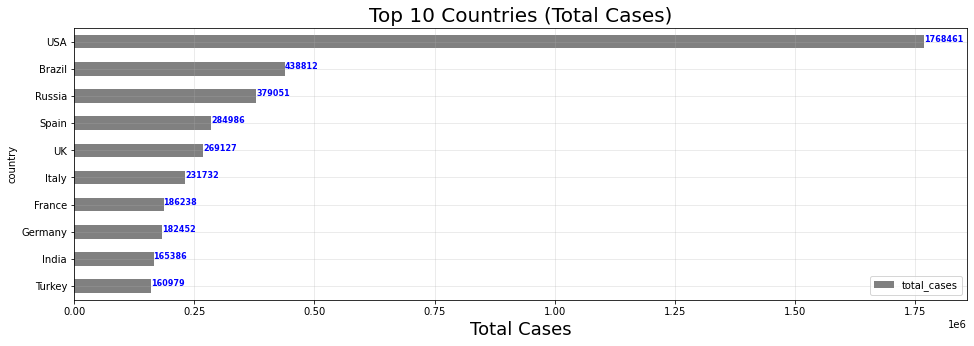

In [352]:
df_top_10_total = df1[['country','total_cases']].sort_values(by =["total_cases"], ascending = True).iloc[-10:]
df_top_10_total.plot.barh(x='country', y='total_cases', color = "gray")
plt.grid(alpha=0.3,which='both')
plt.xlabel("Total Cases",fontsize=18)
plt.title("Top 10 Countries (Total Cases)",fontsize=20)
for i, v in enumerate(df_top_10_total['total_cases'].values):
    plt.text(v + 3, i , str(v), color='blue', fontweight='bold', fontsize=8)

In [353]:
def draw_pie(field_name):
    df_pie = df_cpy[['country',field_name]].sort_values(by =[field_name], ascending = True).iloc[-10:]
    labels = df_pie.country
    sizes = df_pie[field_name]
    explode = np.full((10), 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode = explode,
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(field_name, fontsize = 18)
    plt.show()

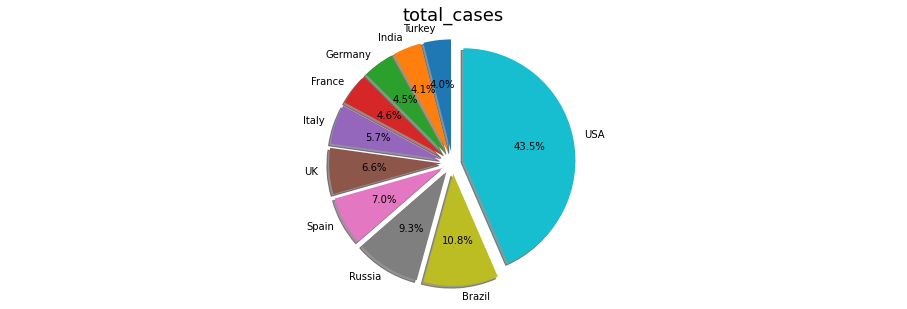

In [354]:
draw_pie('total_cases')

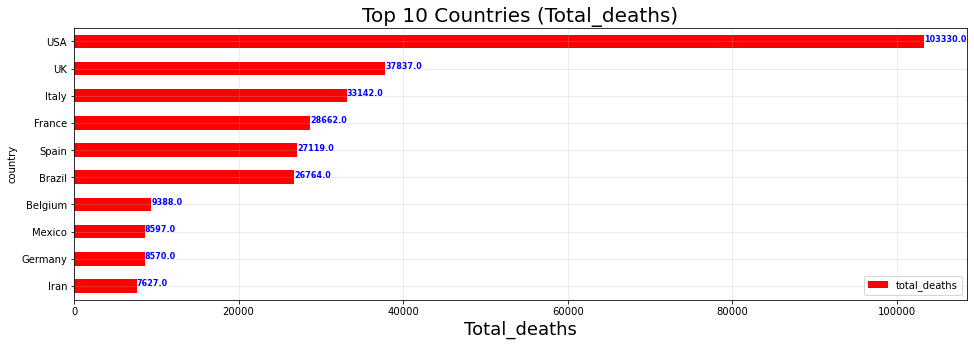

In [355]:
df1 = df[df['Date']=='2020-05-28']
df_top_10_total = df1[['country','total_deaths']].sort_values(by =["total_deaths"], ascending = True).iloc[-10:]
df_top_10_total
df_top_10_total.plot.barh(x='country', y='total_deaths', color = "red")
plt.grid(alpha=0.3,which='both')
plt.xlabel("Total_deaths",fontsize=18)
plt.title("Top 10 Countries (Total_deaths)",fontsize=20)
for i, v in enumerate(df_top_10_total['total_deaths'].values):
    plt.text(v + 3, i , str(v), color='blue', fontweight='bold', fontsize=8)

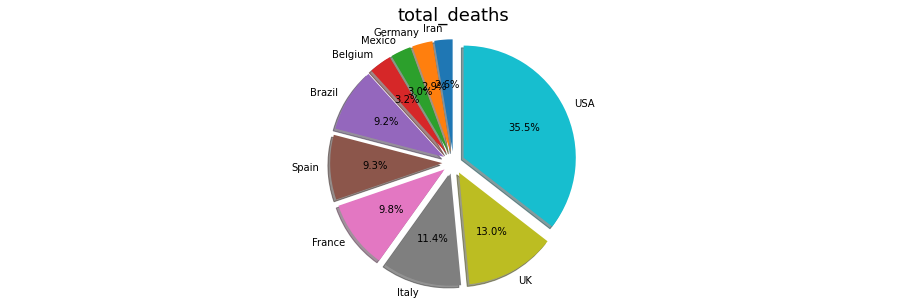

In [356]:
draw_pie('total_deaths')

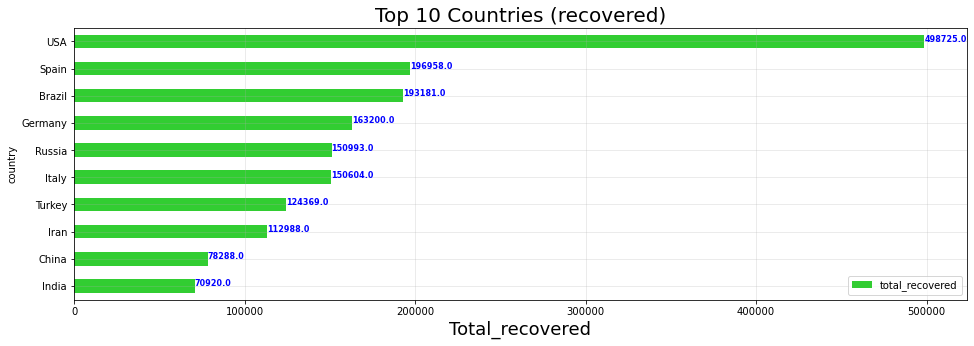

In [357]:
df_top_10_total = df_cpy[['country','total_recovered']].sort_values(by =["total_recovered"], ascending = True).iloc[-10:]
df_top_10_total.plot.barh(x='country', y='total_recovered', color = "limegreen")
plt.grid(alpha=0.3,which='both')
plt.xlabel("Total_recovered",fontsize=18)
plt.title("Top 10 Countries (recovered)",fontsize=20)
for i, v in enumerate(df_top_10_total['total_recovered'].values):
    plt.text(v + 3, i , str(v), color='blue', fontweight='bold', fontsize=8)

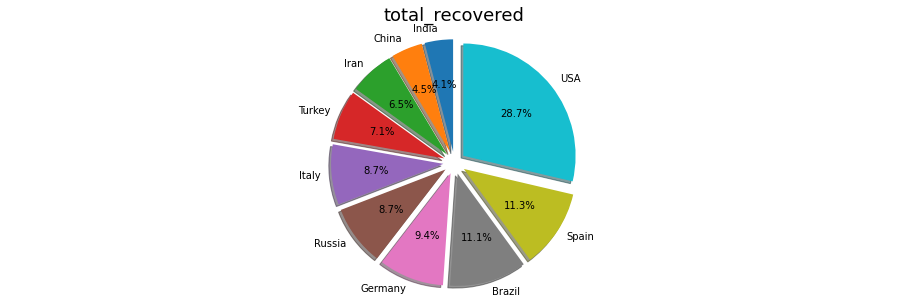

In [358]:
draw_pie('total_recovered')

##### Nhận xét : 
- Do giá trị của các trường đang xét là số lượng (quantitative) và có 1 key là thuộc tính thể loại
(category), nên nhóm chọn biểu đồ cột ( bar chart ) để trực quan. Nhóm chọn cột ngang để so
sánh độ chênh lệch của các quốc gia dễ dàng hơn. Bên cạnh đó sử dùng biểu đồ tròn ( pie
chart ) để so sánh tỉ lệ nhiễm bệnh của các quốc gia 1 cách dễ dàng. 
- Biểu đồ cột ngang dùng để so sánh sự chênh lệch giữa các quốc gia một cách dễ dàng trong khi biểu đồ tròn dùng để so sánh tỉ lệ . Có thể nhận thấy tình hình diễn biến của dịch tại các quốc gia top đầu đang rất phức tạp, đặc biệt là Mỹ khi số lượng ca mắc phải cũng như số lượng cái chết đang vượt trội hơn so với các nước còn lại. Tuy nhiên điểm sáng của Mỹ cũng là đến từ tỷ lệ hồi phục khi Mỹ cũng đang là đất nước dẫn đầu . Giống như tuyên bố của tổng thống Mỹ " Nước Mỹ sẽ luôn đứng đầu thế giới về mọi mặt"

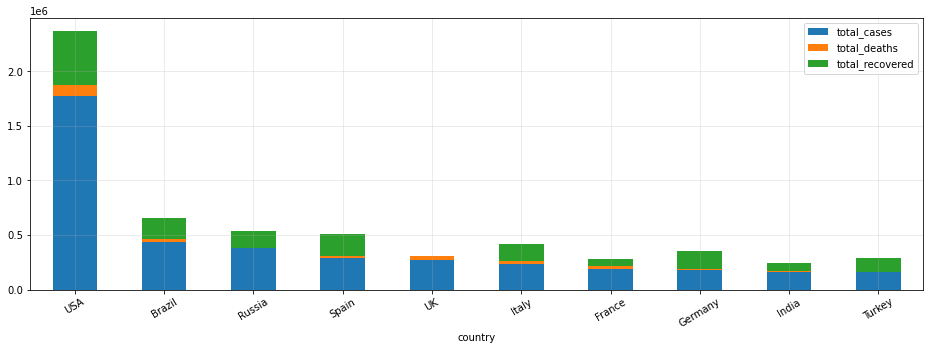

In [359]:
# bar chart 
X =df1[['country','total_cases', 'total_deaths', 'total_recovered']]
X = X.set_index('country').sort_values(by="total_cases", ascending = False).iloc[0:10]
X.plot.bar(stacked = True)
plt.xticks(rotation=31)
plt.grid(alpha=0.3,which='both')

##### Nhận xét : 
- Nhóm chọn biểu đồ chồng để thể hiện so sánh đồng thời cả 3 trường dữ liệu đang xét cùng một lúc. Mỗi kênh màu xanh dương, cam, xanh lá tương ứng với mỗi trường dữ liệu là TotalCases, Total Deaths, Total Recovered. Giúp dễ dàng hơn trong việc nhận xét chỉ lệ nhiễm bệnh, tỉ lệ tử vong và hồi phục của 1 quốc gia
- Khi sử dụng biểu đồ cột chồng ta có thể phát hiện 1 vài thông tin như UK không có ca nhiễm bệnh nào được chữa khỏi. Nga(Rusia),Tây Ban Nha(Spain), Đức(Germany) tỉ lệ tử vong trong những người nhiễm bệnh là không cao. Trong khi Ấn Độ (India) hay Thổ Nhĩ Kỳ(Turkey) thì số ca hồi phục là 100% 

##### Ý nghĩa : 
- Qua việc quan sát các biểu đồ trên thì đây là những quốc gia, và những khu vực mà nó thuộc về cần phải đặc biệt chú ý vấn đề sức khỏe nếu chúng ta đang sinh sống hoặc là có dự địnhđến những quốc gia, khu vực đó.


### 1.2 Phân tích theo các khu vực

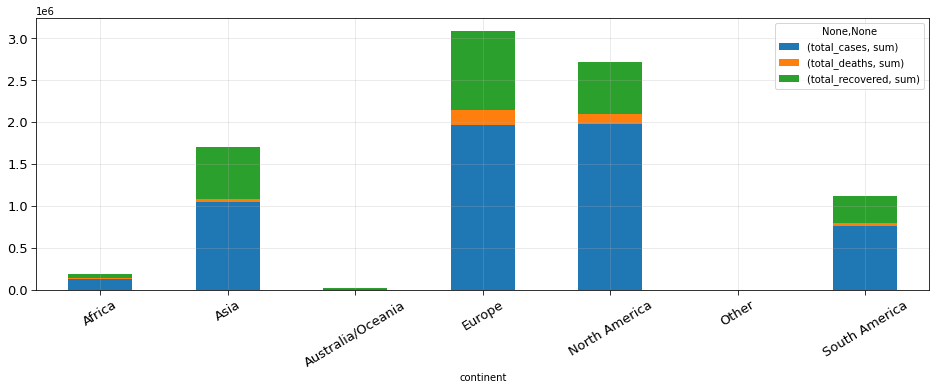

In [360]:
df_gr_area = df1.groupby('continent')[['total_cases', 'total_deaths', 'total_recovered']].agg(['sum'])
df_gr_area.plot.bar(stacked = True)
plt.tick_params(size=5,labelsize = 13)
plt.xticks(rotation=31)
plt.grid(alpha=0.3,which='both')

##### Nhận xét :
* Bắc Mỹ (North American) và Châu Âu (Europe) vẫn đang dẫn đầu về số lượng ca nhiễm . Cho biết tình hình vẫn đang diễn ra rất phức tạp ở đây

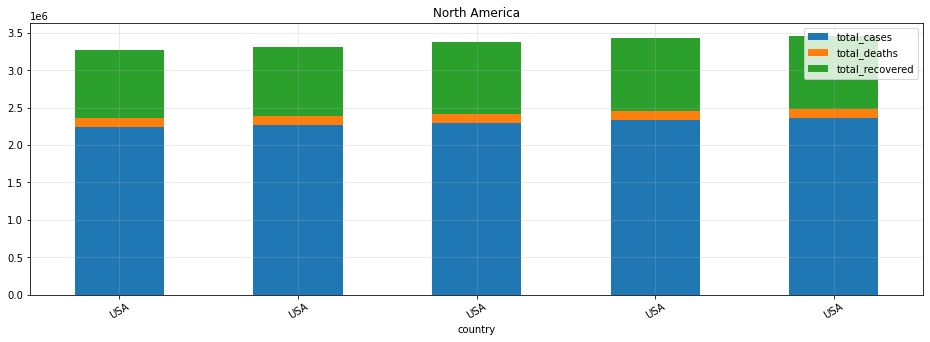

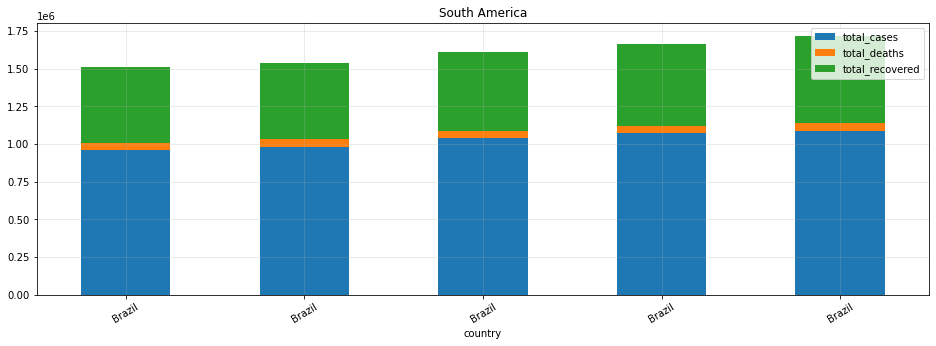

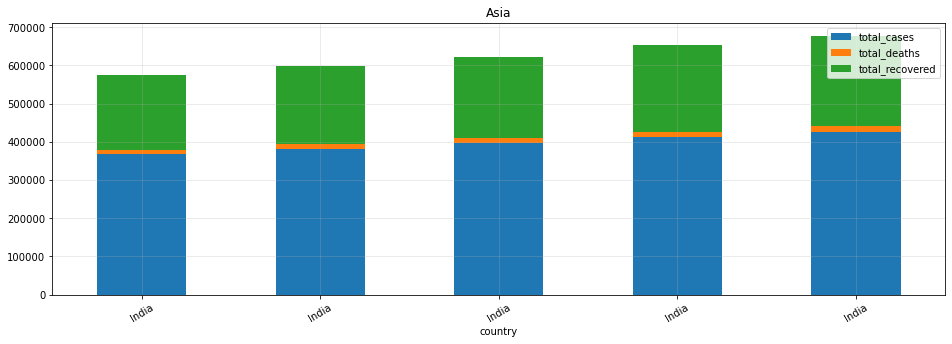

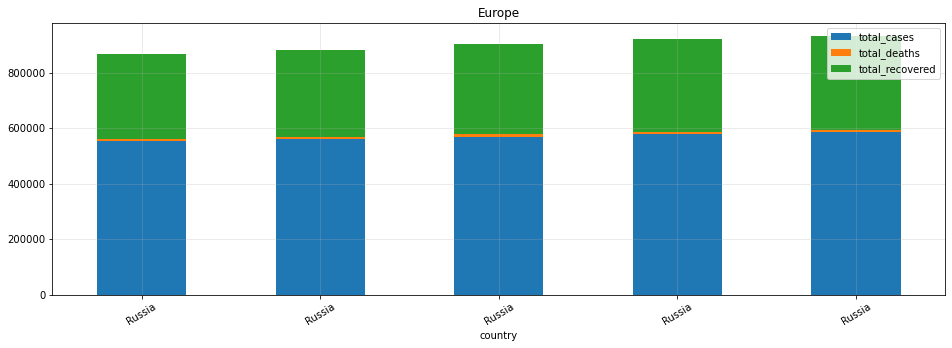

In [361]:
def draw(field_name):
    df_gr = df[df['continent'] == field_name].sort_values('total_cases', ascending = True)[-5:]
    df_gr.set_index(['country'], inplace = True)
    df_gr[['total_cases', 'total_deaths', 'total_recovered']].plot.bar(use_index = True, stacked=True).set_title(field_name)
    plt.xticks(rotation=31)
    plt.grid(alpha=0.3,which='both')


draw('North America')
draw('South America')
draw('Asia')
draw('Europe')

##### Nhận xét :
* Ở khu vực Bắc Mĩ (North American), Mỹ có số ca nhiễm vượt trội so với các quốc gia còn lại. Tương tự, Brazil cũng ghi nhận số trường hợp nhiễm cao nhất ở khu vực Nam Mĩ( South American ). Mỹ và Brazil có số ca nhiễm đã vượt qua con số 1 triệu người.
* Tỉ lệ tử vong của các quốc gia ở khu vực Nam Mĩ thấp so với số ca nhiễm bệnh và tỉ lệ phục hồi cũng rất cao đặc biệt là Chi Lê và Peru. Cho thấy những quốc gia này đang dần làm chủ được tình hình và việc điều trị cũng đạt được những đáng ghi nhận
* Ở Châu Á, thì Ấn Độ có số ca nhiễm nhiều nhất. Và Saudi Arabia đang là quốc gia làm tốt nhất trong việc phòng chóng và điều trị bệnh dịch với tỉ lệ hồi phục cao và tử vong rất thấp
* Ở Europe thì bây giờ có thể thấy rõ hơn là không ghi nhận ca hồi phục nào khi mắc bệnh gần như 100% ở các nước UK và Spain cho đến thời điểm hiện tại

##### Ý Nghĩa :
- Qua việc quan sát các biểu đồ trên thì ta rút ra được khu vực nào là điểm nóng về dịch ,bùng
phát trên thế giới. Cũng như các quốc gia hiện đang đứng đầu trong từng khu vực đó

# 2. Histogram và box plot

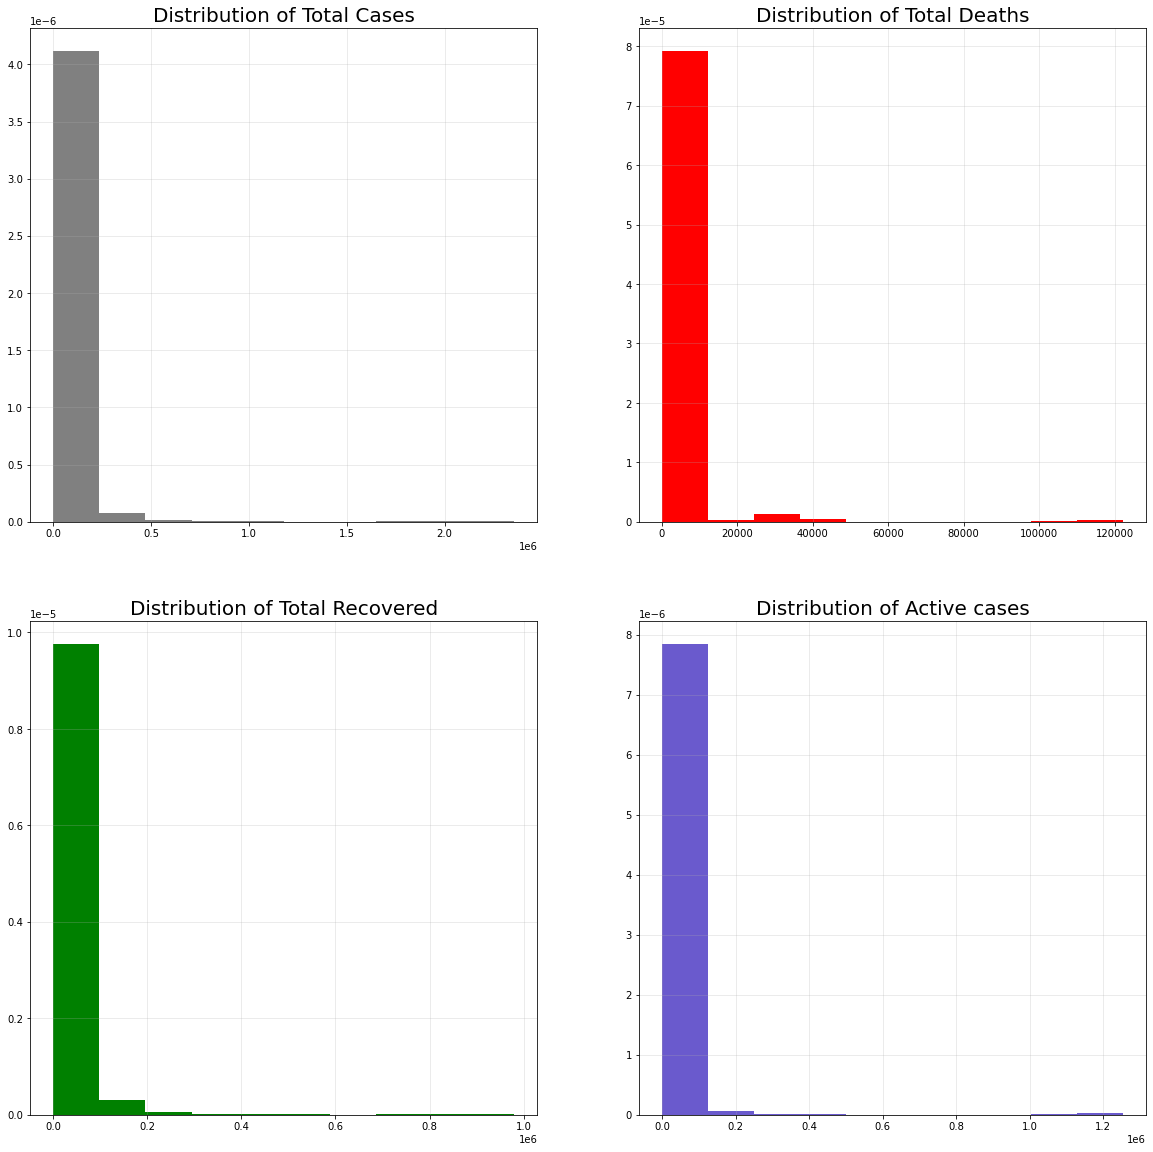

In [362]:
from scipy import stats
f, ax = plt.subplots(2,2, figsize=(20,20))

ax[0,0].hist(df['total_cases'], density=True, color="gray")
ax[0,0].set_title("Distribution of Total Cases",fontsize=20)
ax[0, 0].grid(alpha=0.3,which='both')

ax[0,1].hist(df['total_deaths'], density=True,  color = "red")
ax[0,1].set_title("Distribution of Total Deaths",fontsize=20)
ax[0,1].grid(alpha=0.3,which='both')

ax[1,0].hist(df['total_recovered'], density=True, color = "green")
ax[1,0].set_title("Distribution of Total Recovered",fontsize=20)
ax[1,0].grid(alpha=0.3,which='both')

ax[1,1].hist(df['active_cases'], density=True, color = "slateblue")
ax[1,1].set_title("Distribution of Active cases",fontsize=20)
ax[1,1].grid(alpha=0.3,which='both')

##### Nhận xét : 
- Số trường hợp ca nhiễm trung bình ở các quốc gia trong khoảng từ 0 đến dưới 20000 ca nhiễm. Tương tự số trường hợp tử vong trong khoảng 0 đến dưới 1000, số trường hợp hồi phục trong khoảng từ 0 đến dưới 10000, và số ca nhiễm hiện tại trung bình dao động trong khoảng từ 0 đến dưới 100.000-150.000

In [363]:
# Loại bỏ nhiễu 
def removeNoisy(A, lower, higher):
    v_lower = np.quantile(A, lower)
    v_higher = np.quantile(A, higher)
    X = [x for x in A if x<v_higher and x>v_lower]
    return X 

Text(0.5, 1.0, 'Box plot (Active Cases)')

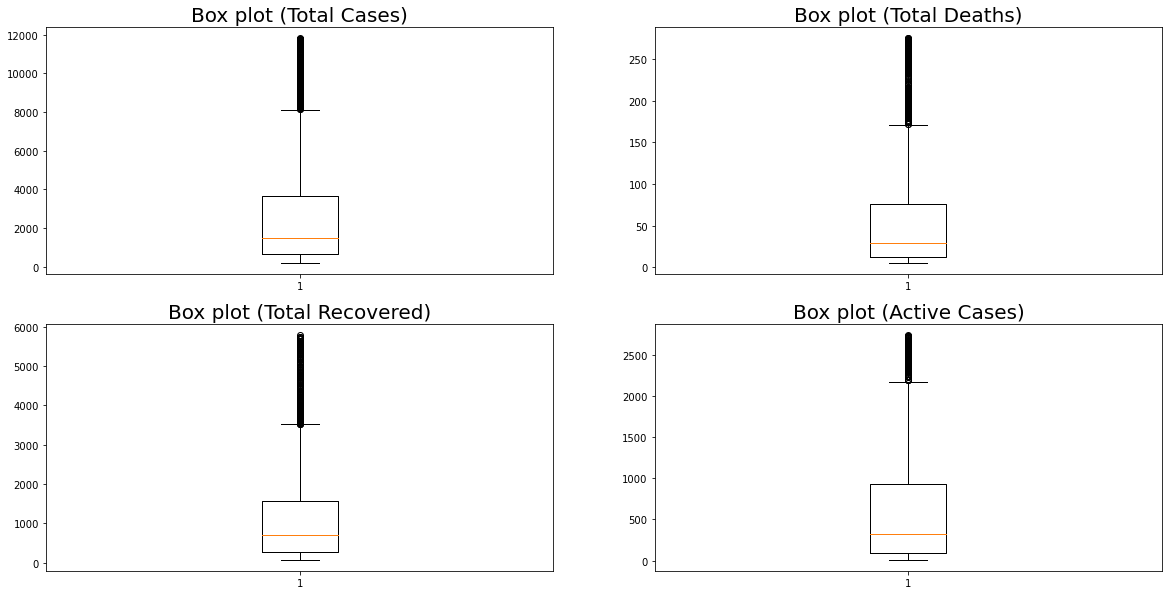

In [364]:
plt.figure(figsize=(20, 10))

Total_Cases = removeNoisy(df['total_cases'], 0.25, 0.75)
#print(Total_Cases)
plt.subplot(2,2,1)
plt.boxplot(Total_Cases)
plt.title("Box plot (Total Cases)",fontsize=20)

Total_Deaths = removeNoisy(df['total_deaths'], 0.25, 0.75)
plt.subplot(2,2,2)
plt.boxplot(Total_Deaths)
plt.title("Box plot (Total Deaths)",fontsize=20)

Total_Recovered = removeNoisy(df['total_recovered'], 0.25, 0.75)
plt.subplot(2,2,3)
plt.boxplot(Total_Recovered)
plt.title("Box plot (Total Recovered)",fontsize=20)

Active_Cases = removeNoisy(df['active_cases'], 0.25, 0.75)
plt.subplot(2,2,4)
plt.boxplot(Active_Cases)
plt.title("Box plot (Active Cases)",fontsize=20)

##### Nhận xét : 
- Ở đây để vẽ biểu đồ boxplot cho trực quan hóa ở phần này đã loại bỏ các outlier mạnh. Cụ thể là ở mỗi trường dữ liệu, ta tiến hành sắp xếp theo tăng dần và lấy trong khoảng từ 25% đến 75% giữ liệu gốc.
- Sau khi đã loại bỏ outlier đi ( những quốc gia có quá ít trường hợp nhiễm hoặc quá cao) thì ta có số trường hợp nhiễm trung bình khoảng 1500 người, tử vong khoảng 30, hồi phục là khoảng 600 và số trường hợp dương tính còn ghi nhận là khoảng 300 người.

##### Ý nghĩa :
- Vẽ biểu đồ boxplot giúp chúng ta nhìn nhận các giá trị ngoại vi dễ dàng, tổng kết phân bố dữ liệu, dễ dàng so sánh với các nhóm dữ liệu khác. Tuy nhiên nó không giữ lại các thông tin chi tiết về sự phân phối của dữ liệu nên đó là lí do kết hợp thêm biểu đồ histogram( ở trên ) để có thể có những phân tích chi tiết hơn về sự phân bố của dữ liệu.

# 3 : Tìm hiểu mối quan hệ giữa các trường dữ liệu

In [365]:
!pip install seaborn 

In [366]:
import seaborn as sns

In [367]:
def filter(df,low, high):
    quant_df = df.quantile([low, high])
    df = df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & (x < quant_df.loc[high,x.name])], axis=0)
    return df

In [368]:
def _lmplot(names, df,quant):
    df=filter(df,quant[0],quant[1])
    sns.lmplot(x=names[0],y=names[1], data=df)

In [369]:
def multiLmplot(names,dataframes,quant):
    n= len(names)
    m= len(quant)
    for i in range(n):
        for j in range(m):
            _lmplot(names[i],dataframes[i],quant[j])

### 3.1 Quan hệ giữa tỉ lệ ca nhiễm và số người chết

* Nhóm sẽ chuyển hóa dữ liệu sang dạng scatter. Mỗi điểm ứng với 1 quốc gia để tìm mối quan hệ giữa số người chết với số ca nhiễm. Nhóm chia dữ liệu thành 3 phần từ phân vị 0-50%, 50- 85% và 85-100% tương ứng với các nước có số ca nhiễm tập, trung bình và cao.Để có thể quan sát một cách đầy đủ nhất

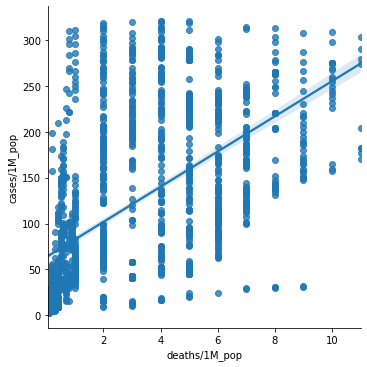

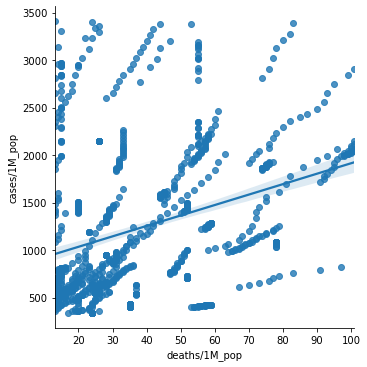

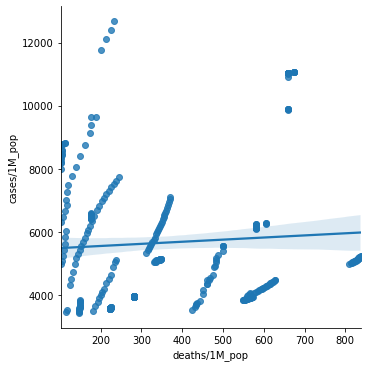

In [370]:
names=[["deaths/1M_pop","cases/1M_pop"]]
# Them vao dataframe
dataframes=[]
for name in names:
    dataframes.append(df[name])
quant=[[0,0.5],[0.5,0.85],[0.85,1]]
multiLmplot(names,dataframes,quant)

##### Ý nghĩa:
- Số người chết tỉ lệ thuân với với ca nhiễm . Điều đó có thể được giải thích bằng sự quá tải của các bệnh viện và cơ sở chữa bệnh khi số ca mắc bệnh tăng nên số người không được cứu chữa đầy đủ cũng tăng => nguyên nhân làm cho số người chết tăng

### 3.2 Quan hệ giữa tỉ lệ test với  số trường hợp chết mới

* Do có những nước không công bố số liệu xét nghiệm nên nhóm quyết định hồi quy trên toàn bộ tập dữ liệu.

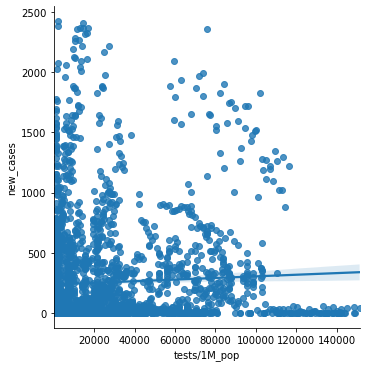

In [371]:
names=[["tests/1M_pop","new_cases"]]
dataframes=[]
for name in names:
    dataframes.append(df[name])
quant=[[0,0.95]]
multiLmplot(names,dataframes,quant)

##### Ý nghĩa:
- Cho thấy sự hiệu quả của việc việc xét nghiệm COVID với việc giảm số người chết mới. Có thể lí giải bằng việc những người mắc bệnh có thể được chữa trị kịp thời. - Nhưng cũng tồn tại sự không chắc chắn trong kết quả thu được do có rất nhiều quốc qua không chịu công bố số liệu xét nghiệm.

### 3.3 Quan hệ giữa tỉ lệ test với số ca mắc bệnh mới số người chết

* Nhóm cũng chia dữ liệu thành 3 phần ứng với mức độ nhiễm bệnh.

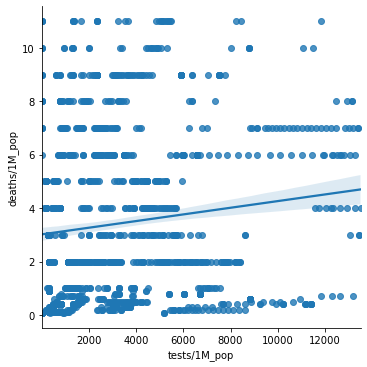

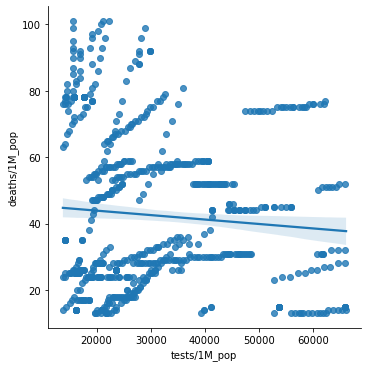

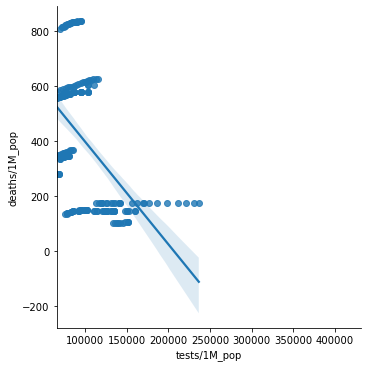

In [372]:
names=[["tests/1M_pop","deaths/1M_pop"]]
dataframes=[]
for name in names:
    dataframes.append(df[name])
quant=[[0,0.5],[0.5,0.85],[0.85,1]]
multiLmplot(names,dataframes,quant)

##### Ý nghĩa:
- Đối với các nước ở mức cao thì việc xét nghiệm càng nhiều sẽ cứu được càng nhiều người. Còn đối với các nước trung bình và thấp thì gần như không tác dụng hiệu quả.

### 3.4 Quan hệ giữa “tests/1M_pop” và “cases/1M_pop” 

* Nhóm chỉ lấy dữ liệu từ 0 – 50% và 50% đến 90%. Nhóm làm vậy để lọc bỏ bớt những điểm ngoại vi làm nhiễu đường hồi qui

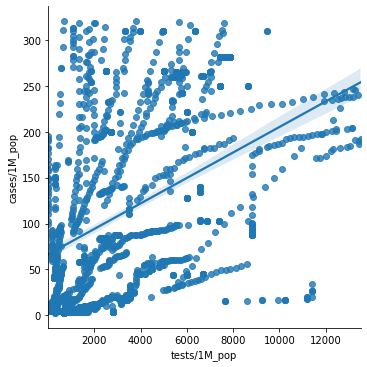

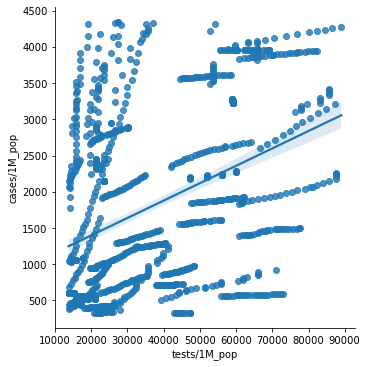

In [373]:
names=[["tests/1M_pop","cases/1M_pop"]]
dataframes=[]
for name in names:
    dataframes.append(df[name])
quant=[[0,0.5],[0.5,0.9]]
multiLmplot(names,dataframes,quant)

##### Ý nghĩa:
- Nhận thấy rằng, khi số ca xét nghiệm trên dân số tăng lên thì sẽ phát hiện được càng nhiều ca mắc mới. Nghĩa là thực tế có rất nhiều ca mắc bệnh có thể lây nhiễm nếu không được phát hiện kịp thời.

# 4. Phân tích dữ liệu timeseries

#### Ở bước này nhóm sẽ thực hiện phân tích trên toàn bộ tập dataset (28/05/2020 -> 21/06/2020)

In [374]:
sources = df.Date.unique()
sources

array(['2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31',
       '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
       '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08',
       '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12',
       '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16',
       '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20',
       '2020-06-21'], dtype=object)

In [375]:
DAY =[]
for i in range(0,len(sources)):
    DAY.append(sources[i][-5:])

In [376]:
x=df.groupby(['Date'])
x # sap xep theo ngay roi
y=[]
Asia,N_America,S_America,Europe,Africa,Australia=[],[],[],[],[],[]
for i in sources:
         day= x.get_group(i) # Lấy ra từng ngày
         y.append(day.groupby(['continent'])) # mảng y chứa từng ngày sắp xếp theo continent
for j in range(len(sources)): # Lấy tổng số liệu qua từng ngày
    Asia.append(y[j].get_group('Asia').sum()) 
    N_America.append(y[j].get_group('North America').sum()) 
    S_America.append(y[j].get_group('South America').sum()) 
    Europe.append(y[j].get_group('Europe').sum()) 
    Africa.append(y[j].get_group('Africa').sum()) 
    Australia.append(y[j].get_group('Australia/Oceania').sum()) 

In [377]:
def anotation(frame1,frame2):
    for u,v in zip(frame1,frame2):
        label = "{:.0f}".format(v)
        plt.annotate(label, # this is the text
                     (u,v), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center

## Tổng quan : Nhóm sẽ phân tích sự ảnh hưởng của đại dịch lên toàn thế giới , đến từng khu vực và cuối cùng là đi vào chi tiết từng quốc gia, vùng lãnh thổ.


## 4.1  World

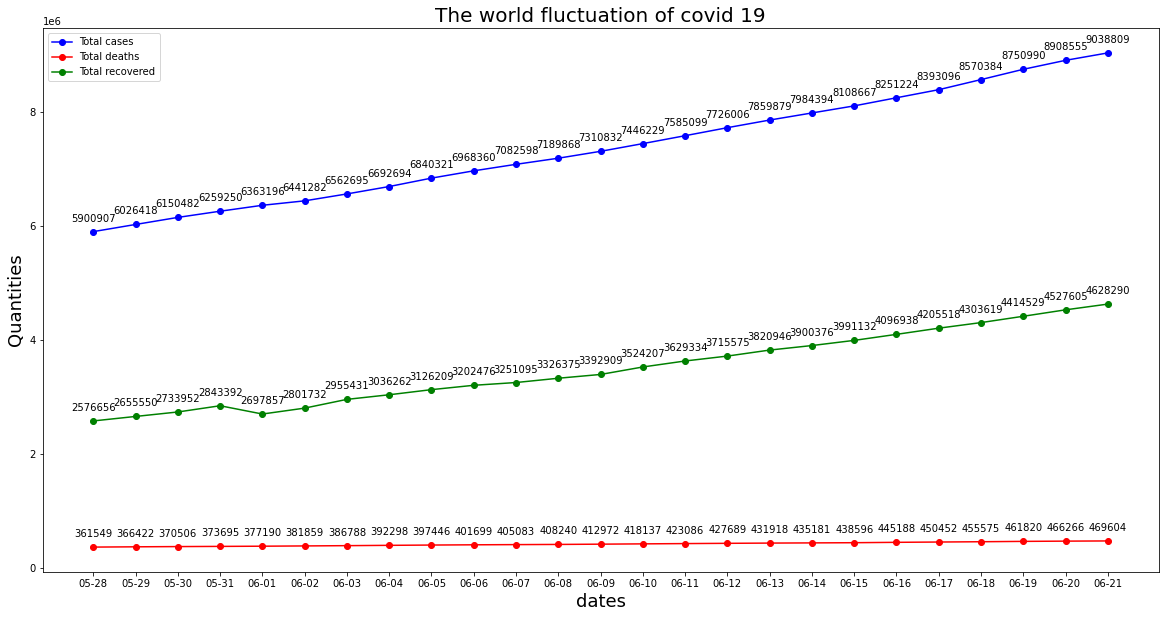

In [378]:
plt.rcParams['figure.figsize'] = (20, 10)
world=[]
arr1,arr2,arr3,arr4,arr5,arr6,arr7=[],[],[],[],[],[],[]
for i in sources:
         day= x.get_group(i) # Lấy ra từng ngày
         world.append(day.sum())
for i in world:
    arr1.append(i.new_cases)
    arr2.append(i.new_deaths)
    arr3.append(i.active_cases)
    arr4.append(i.serious)
    arr5.append(i.total_cases)
    arr6.append(i.total_deaths)
    arr7.append(i.total_recovered)
plt.xlabel("dates",fontsize=18)
plt.ylabel("Quantities",fontsize=18)
plt.title("The world fluctuation of covid 19",fontsize=20)

'''
arr1: new_cases ; arr2: new_deaths ; arr3:active_cases ; arr4:serious ; arr5:total_cases ; arr6:total_deaths ; arr7:total_recovered
------------------------------------------------------------------------------------------------------------------------
'''

plt.plot(DAY,arr5,'bo-',label='Total cases')
anotation(DAY,arr5)
plt.plot(DAY,arr6,'ro-',label='Total deaths') 
anotation(DAY,arr6)
plt.plot(DAY,arr7,'go-',label='Total recovered') 
anotation(DAY,arr7)
plt.legend()
plt.show()

#### Nhận xét:
- Tính đến thời điểm ngày 21/6/2020 đã có tổng cộng 9.038.809 ca nhiễm trên toàn thế giới.Hơn 1/2 trong số đó đã hoàn toàn bình phục (4628290 người) trong khi số người thiệt mạng vì đại dịch ước tính chiếm 5% trên tổng số người mắc bệnh (469.604 người).
- Tổng số người hồi phục hoàn toàn luôn ở mức cao hơn và cũng có tốc độ tăng nhanh hơn số người tử vong . Tuy nhiên vào ngày 1/6 tổng số ca hồi phục có xu hướng giảm nhưng rồi lại tăng vào những ngày sau. Điều này chứng tỏ một số bệnh nhân đã tái phát bệnh sau khi hoàn toàn được chữa khỏi. 

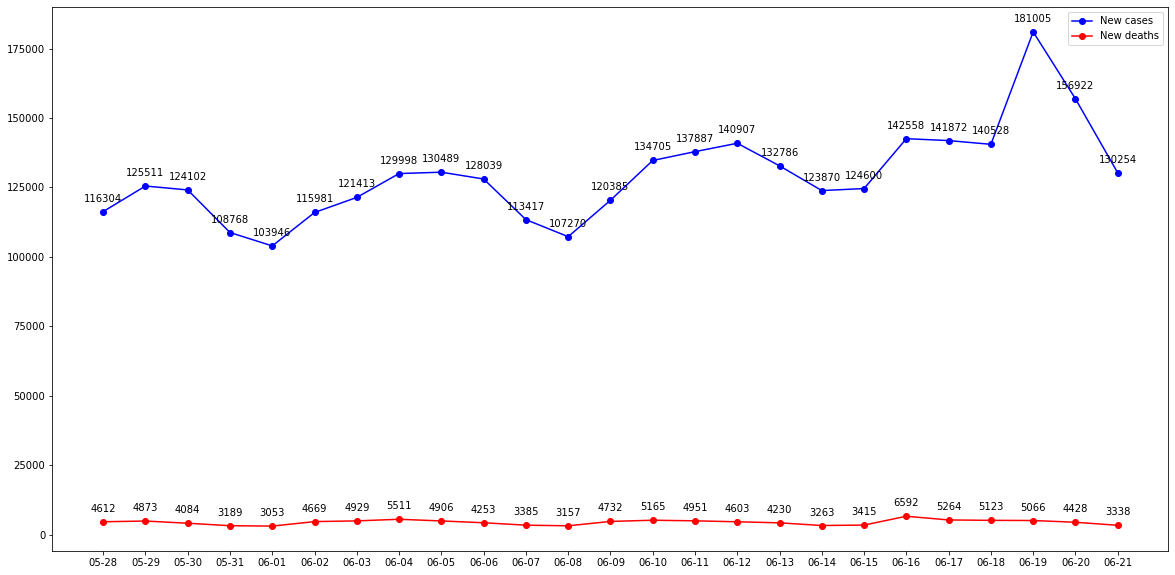

In [379]:
plt.plot(DAY,arr1,'bo-',label='New cases')
anotation(DAY,arr1)
plt.plot(DAY,arr2,'ro-',label='New deaths')
anotation(DAY,arr2)
plt.legend()
plt.show()

#### Nhận xét:
- Số ca mới mỗi ngày luôn biến động rất phức tạp. Tuy lên xuống liên tục nhưng luôn giữ ở con số hơn 100.000 ca nhiễm mới mỗi ngày. Đỉnh điểm là ngày 19/6 với 181.005 ca. Ngày có số ca mới thấp nhất là 1/6 với 103.946 ca.
- Số người chết mỗi ngày giao động ở khoảng hơn 3000-4000 người. Đỉnh điểm là ngày 16/6 với 6592 ca tử vong và 10/6 , 17/6 , 18/6 , 19/6 với hơn 5000 ca tử vong mỗi ngày.

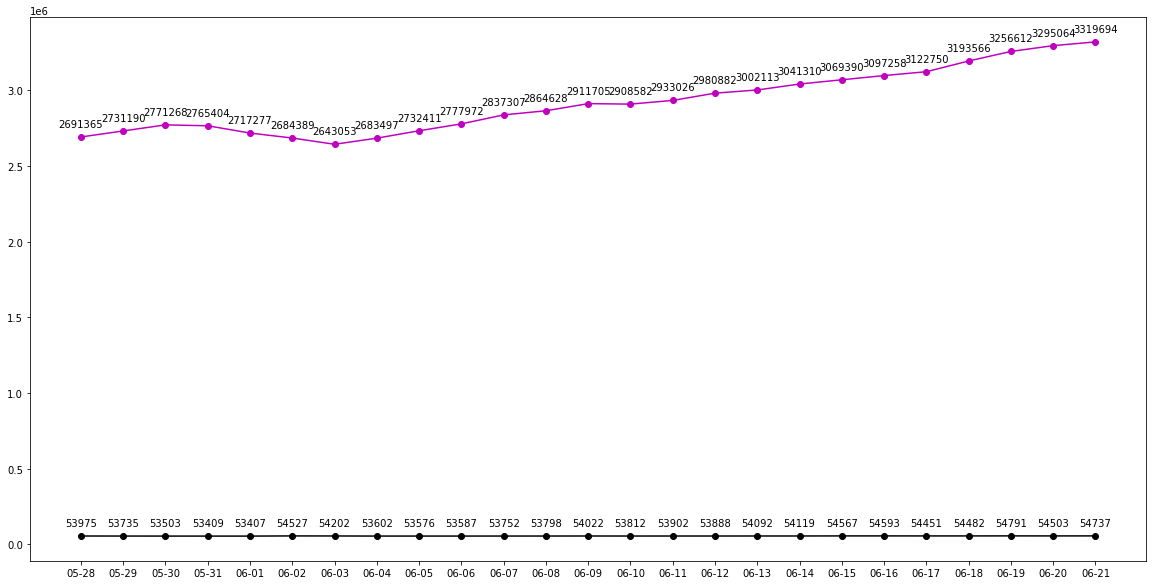

In [380]:
plt.plot(DAY,arr3,'mo-',label='Active cases')
anotation(DAY,arr3)
plt.plot(DAY,arr4,'ko-',label='Serious')
anotation(DAY,arr4)

#### Nhận xét:
- Số “ Active Cases” biến động khá phức tạp. Nó có xu hướng giảm từ ngày 30/5 cho tới 3/6 rồi lại tiếp tục tăng trong những ngày tiếp theo. Tính đến ngày 21/6 số “ Active Cases ” trên toàn thế giới nằm ở con số khá cao (3.319.694 ca) bằng khoảng 1/3 tổng số ca nhiễm, trong khi thấp nhất là ngày 3/6 với 2.643.053 ca.
- Số ca bệnh nặng có khả năng không qua khỏi “ Serious ” luôn giữ ở mức 53.000 đến 54.000 ca không có mấy biến động

#### Ý Nghĩa:
- Dựa vào các biểu đồ line đã thể hiện ở trên . Ta có thể thấy được tổng quan tình hình dịch bệnh trên thế giới và đưa ra nhận xét. Từ đó tìm ra được đỉnh điểm của dịch . Dựa vào biến “New Cases” có thể nhận thấy đỉnh dịch được cho là ở ngày 19/6 với 181.005 ca nhiễm mới và 5066 người tử vong.

## 4.2  Continent

#### Ở insight này nhóm sẽ nhận định sự ảnh hưởng của covid19 với cụ thể từng châu lục

In [381]:
def Area(frame):
    temp1,temp2,temp3,temp4,temp5,temp6,temp7=[],[],[],[],[],[],[]
    for i in frame:
        temp1.append(i.new_cases)
        temp2.append(i.new_deaths)
        temp3.append(i.active_cases)
        temp4.append(i.serious)
        temp5.append(i.total_cases)
        temp6.append(i.total_deaths)
        temp7.append(i.total_recovered)
    return temp1,temp2,temp3,temp4,temp5,temp6,temp7 

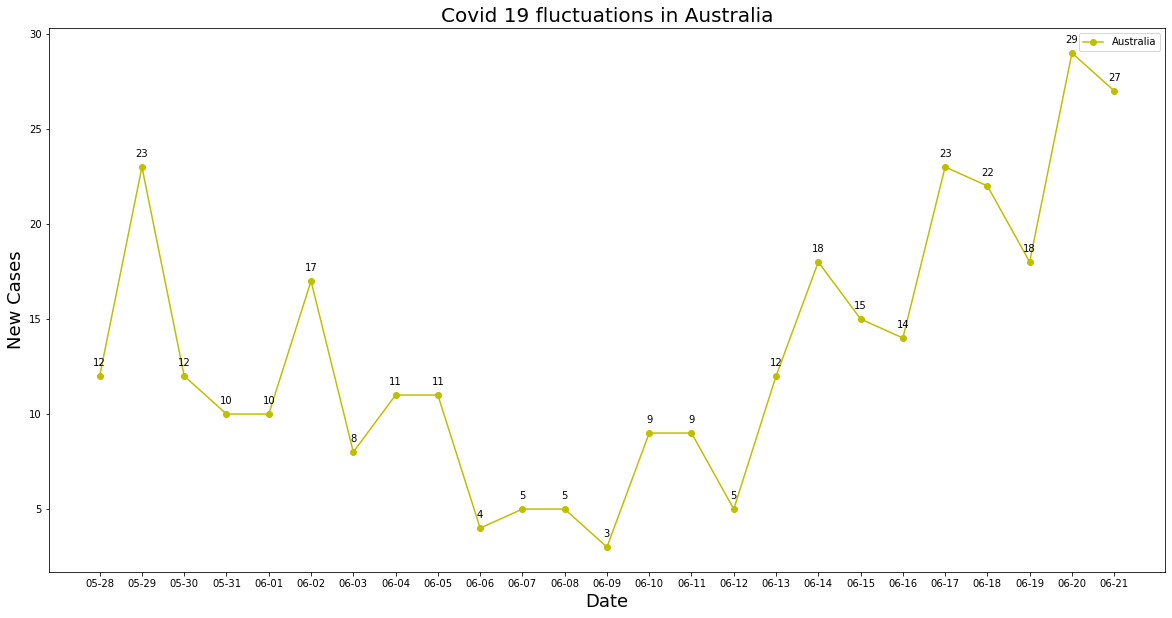

In [382]:
"""
number => 0:new_Cases 1:new_deaths 2:active_cases 3:serious 4:total_cases 5:total_deaths 6:total_recovered

"""

number = 0

#plt.plot(DAY,Area(Asia)[number],'bo-',label='Asia')
#plt.title('Covid 19 fluctuations in Asia',fontsize=20)
#anotation(DAY,Area(Asia)[number])

#plt.plot(DAY,Area(N_America)[number],'go-',label='North American')
#plt.title('Covid 19 fluctuations in North American',fontsize=20)
#anotation(DAY,Area(N_America)[number])

#plt.plot(DAY,Area(S_America)[number],'ro-',label='South American')
#plt.title('Covid 19 fluctuations in South American',fontsize=20)
#anotation(DAY,Area(S_America)[number])

#plt.plot(DAY,Area(Europe)[number],'co-',label='Europe')
#plt.title('Covid 19 fluctuations in Europe',fontsize=20)
#anotation(DAY,Area(Europe)[number])

#plt.plot(DAY,Area(Africa)[number],'ko-',label='Africa')
#plt.title('Covid 19 fluctuations in Africa',fontsize=20)
#anotation(DAY,Area(Africa)[number])

plt.plot(DAY,Area(Australia)[number],'yo-',label='Australia')
plt.title('Covid 19 fluctuations in Australia',fontsize=20)
anotation(DAY,Area(Australia)[number])

plt.legend()
plt.xlabel('Date',fontsize=18)
if (number==0):
    plt.ylabel('New Cases',fontsize=18)
elif (number==1):
    plt.ylabel('New Deaths',fontsize=18)
elif (number==2):
    plt.ylabel('Active Cases',fontsize=18)
elif (number==3):
    plt.ylabel('Serious',fontsize=18)
elif (number==4):
    plt.ylabel('Total Cases',fontsize=18)
elif (number==5):
    plt.ylabel('Total Deaths',fontsize=18)
elif (number==6):
    plt.ylabel('Total Recovered',fontsize=18)
plt.show()

## i. Châu Á 

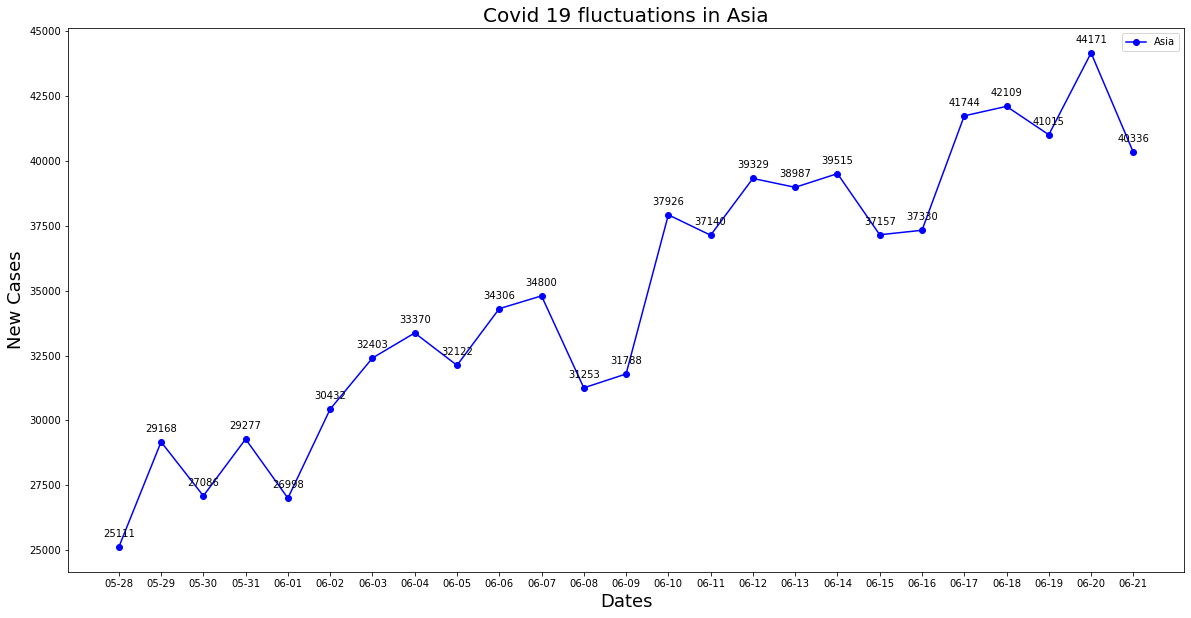

In [383]:
plt.plot(DAY,Area(Asia)[0],'bo-',label='Asia')
plt.title('Covid 19 fluctuations in Asia',fontsize=20)
anotation(DAY,Area(Asia)[0])
plt.legend()
plt.xlabel('Dates',fontsize=18)
plt.ylabel('New Cases',fontsize=18)
plt.show()

#### Nhận xét:
- Số ca nhiễm mới (New Cases) ở Châu Á biến động lên xuống cực kỳ phức tạp.
- Đỉnh điểm có thể kể đến ngày 20/6 với 44.171 ca nhiễm mới gần gấp đôi ngày thấp nhất là 28/5 với 25.111 ca nhiễm.

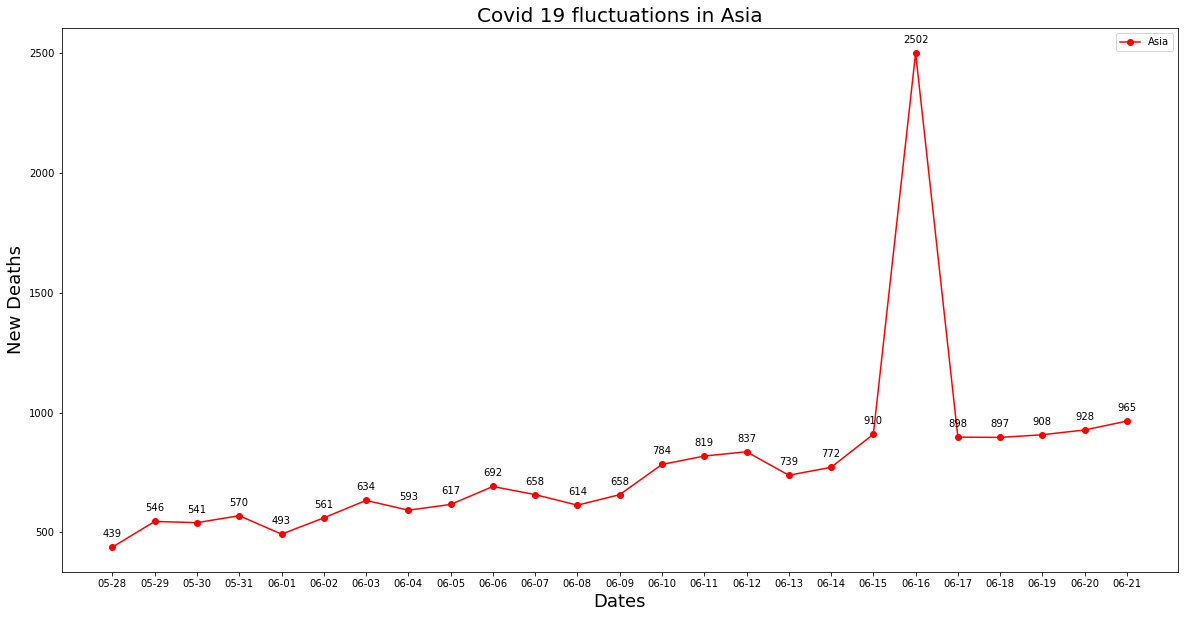

In [384]:
plt.plot(DAY,Area(Asia)[1],'ro-',label='Asia')
plt.title('Covid 19 fluctuations in Asia',fontsize=20)
anotation(DAY,Area(Asia)[1])
plt.legend()
plt.xlabel('Dates',fontsize=18)
plt.ylabel('New Deaths',fontsize=18)
plt.show()

#### Nhận xét:
- Số người tử vong mới (New Deaths) ở Châu Á biến động không quá lớn . Tuy nhiên tới ngày 16/6 con số tử vong tăng cao bất thường với 2502 ca (Gấp 5 , 6 lần bình thường ). Các ngày tiếp theo lại quay trở lại bình thường với 800-900 người chết mỗi ngày

## ii. Bắc Mỹ

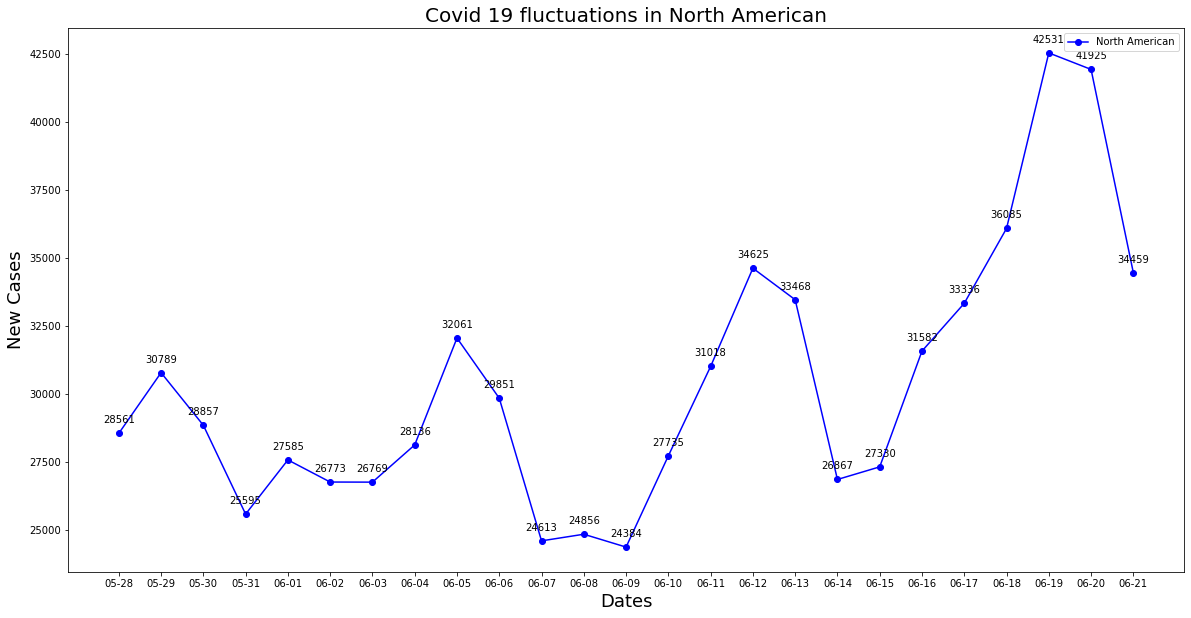

In [385]:
plt.plot(DAY,Area(N_America)[0],'bo-',label='North American')
plt.title('Covid 19 fluctuations in North American',fontsize=20)
anotation(DAY,Area(N_America)[0])
plt.legend()
plt.xlabel('Dates',fontsize=18)
plt.ylabel('New Cases',fontsize=18)
plt.show()

#### Nhận xét:
- Số ca mắc mới luôn trên mức 20000 ca một ngày tuy có nhiều biến động nhưng có xu hướng tăng.
- Cao nhất vào ngày 19/06 với 42531 ca nhiễm mới và thấp nhất vào ngày 09/06 với 24384 ca.

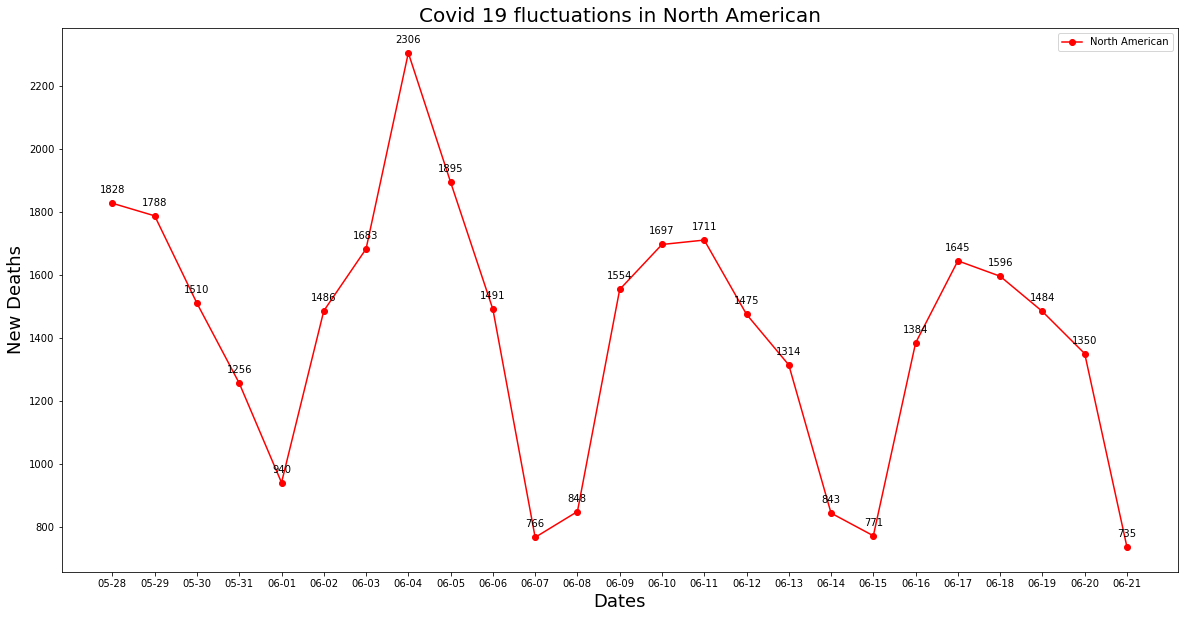

In [386]:
plt.plot(DAY,Area(N_America)[1],'ro-',label='North American')
plt.title('Covid 19 fluctuations in North American',fontsize=20)
anotation(DAY,Area(N_America)[1])
plt.legend()
plt.xlabel('Dates',fontsize=18)
plt.ylabel('New Deaths',fontsize=18)
plt.show()

#### Nhận xét:
- Số ca tử vong có nhiều biến động nhưng luôn trên mức 700 ca một ngày.
- Số ca tử vong đang có xu hướng giảm.
- Cao nhất vào ngày 04/06 với 2306 ca tử vong và thấp nhất vào ngày 21/06 với 735 ca

## iii. Nam Mỹ

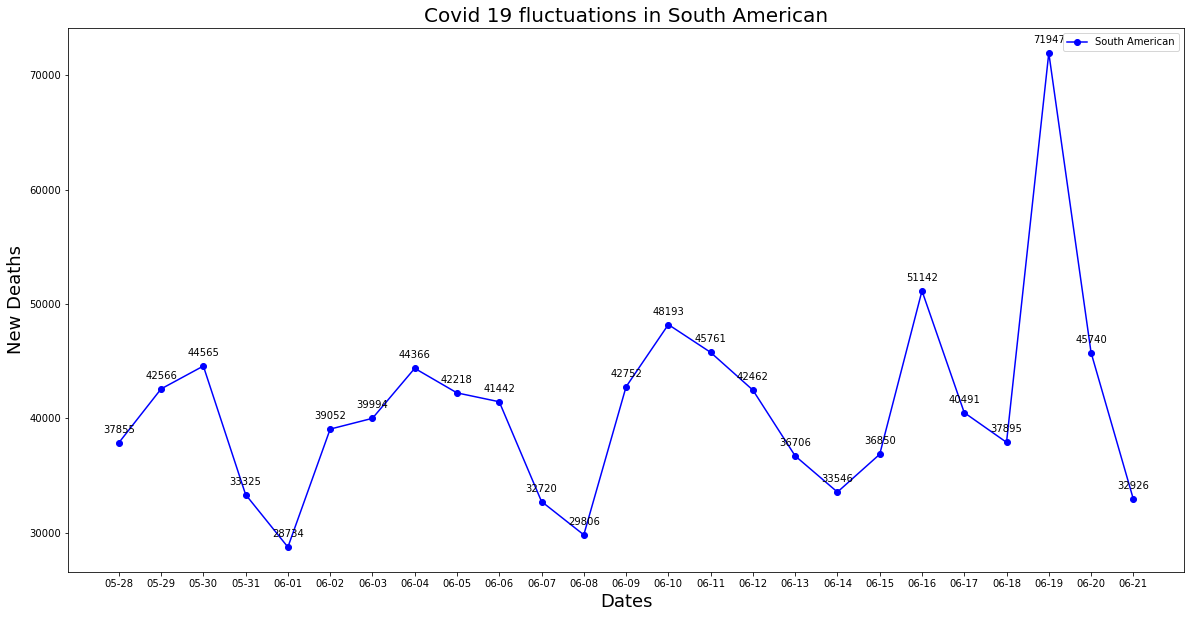

In [387]:
plt.plot(DAY,Area(S_America)[0],'bo-',label='South American')
plt.title('Covid 19 fluctuations in South American',fontsize=20)
anotation(DAY,Area(S_America)[0])
plt.legend()
plt.xlabel('Dates',fontsize=18)
plt.ylabel('New Deaths',fontsize=18)
plt.show()

#### Nhận xét:
- Số ca nhiễm mới luôn mở mức cao cá biệt có ngày 19/06 số ca nhiễm mới tăng đột biến gần gấp đôi số ca nhiễm mới ngày trước đó

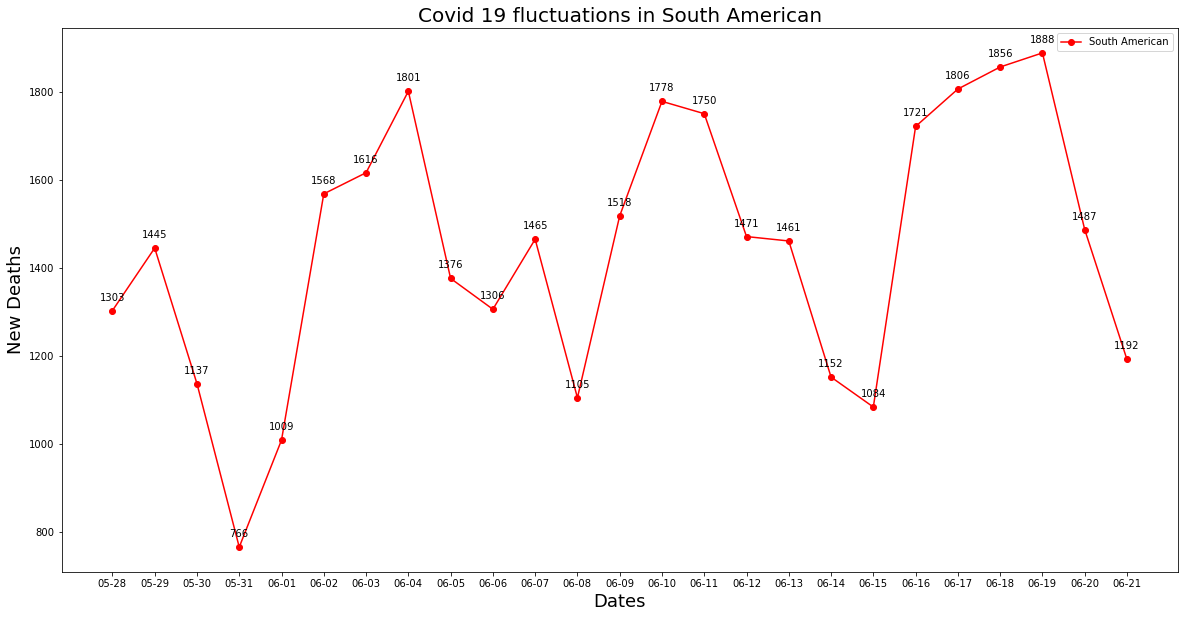

In [388]:
plt.plot(DAY,Area(S_America)[1],'ro-',label='South American')
plt.title('Covid 19 fluctuations in South American',fontsize=20)
anotation(DAY,Area(S_America)[1])
plt.legend()
plt.xlabel('Dates',fontsize=18)
plt.ylabel('New Deaths',fontsize=18)
plt.show()

#### Nhận xét:
- Số ca tử vong hầu như luôn trên mức 1000 ca một ngày. Cao nhất vào ngày 19/06 với 1888 trường hợp tử vong

## iv. Châu Âu

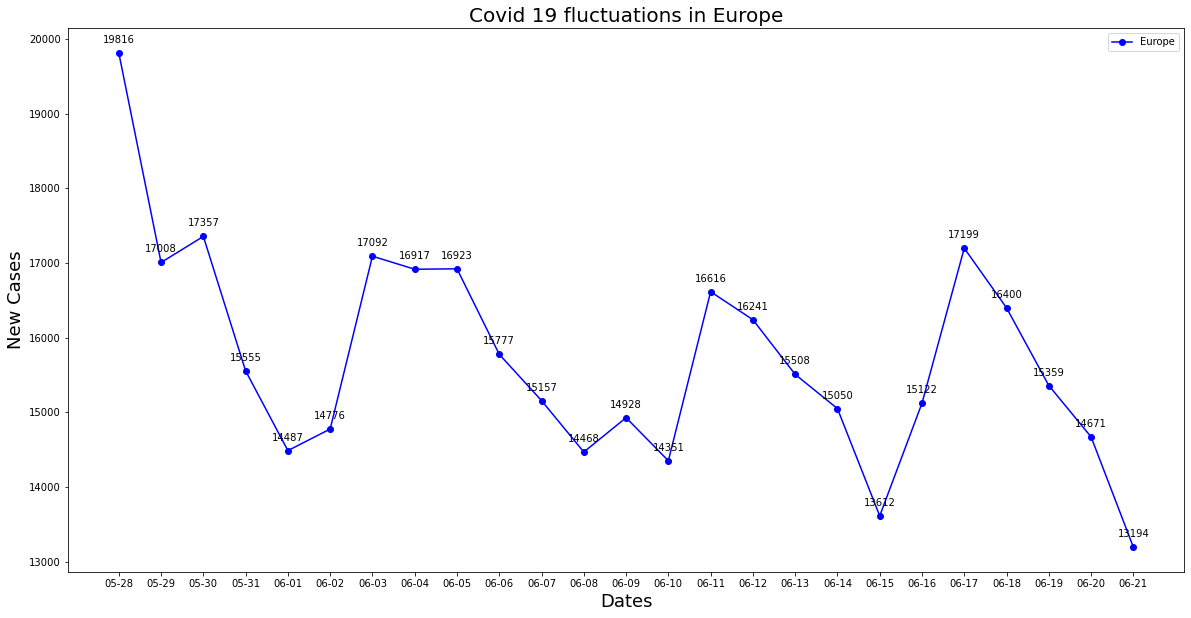

In [389]:
plt.plot(DAY,Area(Europe)[0],'bo-',label='Europe')
plt.title('Covid 19 fluctuations in Europe',fontsize=20)
anotation(DAY,Area(Europe)[0])
plt.legend()
plt.xlabel('Dates',fontsize=18)
plt.ylabel('New Cases',fontsize=18)
plt.show()

#### Nhận xét:
- Số ca nhiễm mới ở châu Âu có nhiều biến động.
- Các ca nhiễm mới có xu hướng giảm dù một vài ngày có tăng trở lại.
- Ngày 28/05 ghi nhận số ca nhiễm mới cao nhất, và 21/06 ghi nhận thấp nhất.

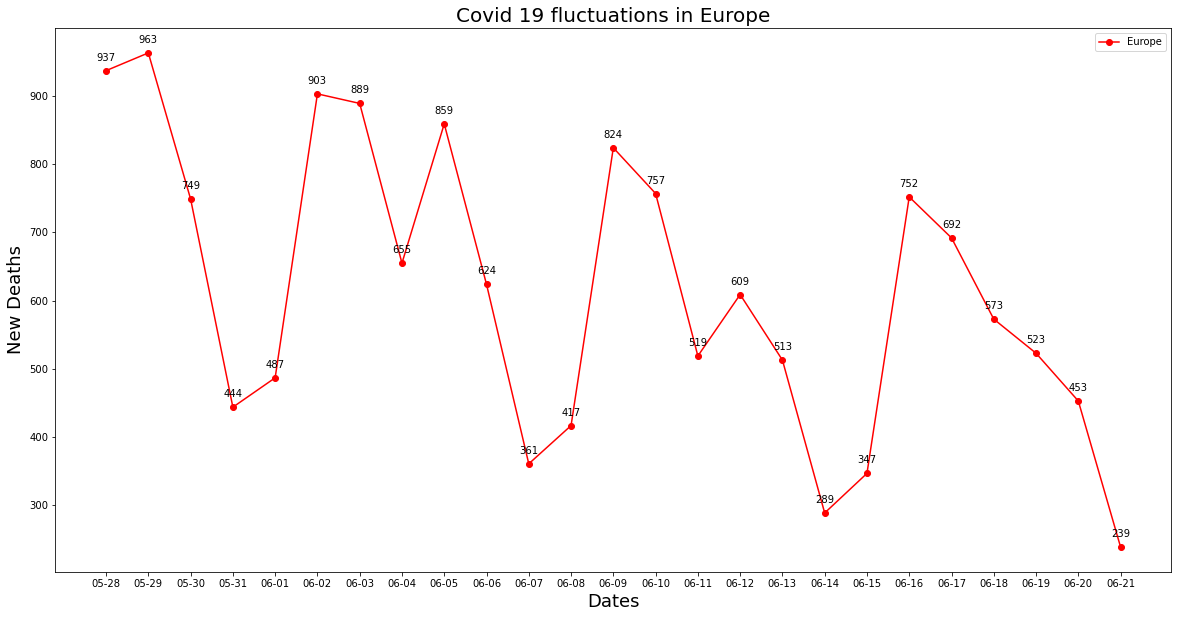

In [390]:
plt.plot(DAY,Area(Europe)[1],'ro-',label='Europe')
plt.title('Covid 19 fluctuations in Europe',fontsize=20)
anotation(DAY,Area(Europe)[1])
plt.legend()
plt.xlabel('Dates',fontsize=18)
plt.ylabel('New Deaths',fontsize=18)
plt.show()

#### Nhận xét:
- Số ca tử vong biến động phù hợp với số ca nhiễm mới.
- Tuy có biến động nhưng có xu hướng giảm.
- Cao nhất vào ngày 29/05 với 963 ca và thấp nhất vào ngày 21/06 với 239 ca.

## V. Châu Phi

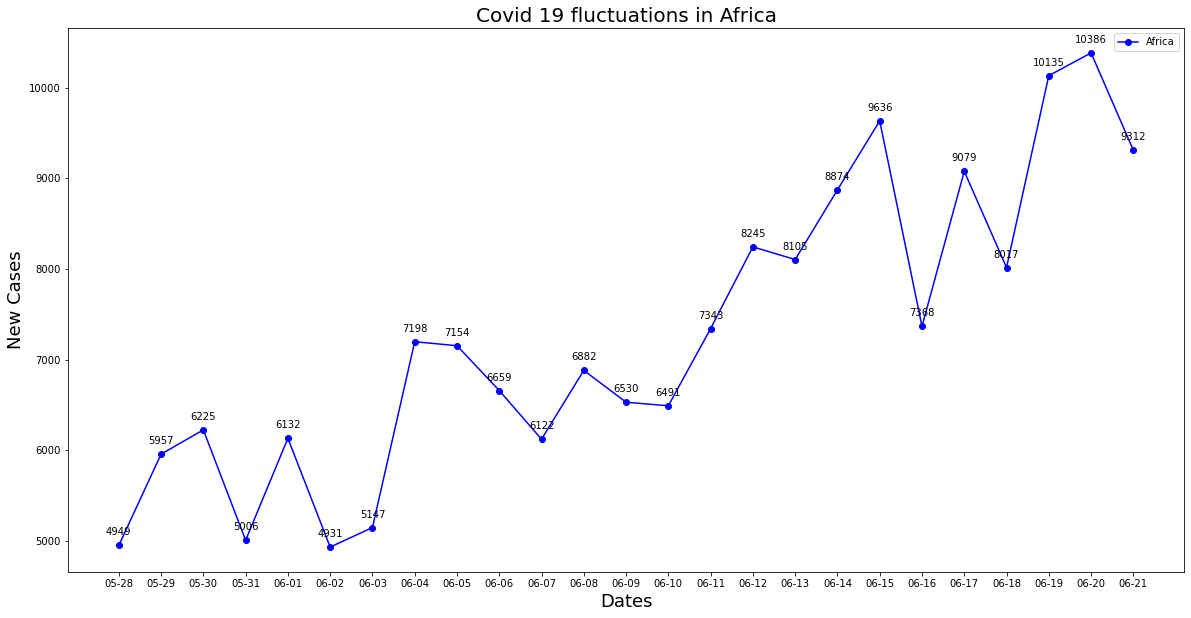

In [391]:
plt.plot(DAY,Area(Africa)[0],'bo-',label='Africa')
plt.title('Covid 19 fluctuations in Africa',fontsize=20)
anotation(DAY,Area(Africa)[0])
plt.legend()
plt.xlabel('Dates',fontsize=18)
plt.ylabel('New Cases',fontsize=18)
plt.show()

#### Nhận xét:
- Số ca mắc mới có nhiều biến động. Nhưng có xu hướng tăng và luôn ở mức cao.
- Cao nhất vào ngày 15/06 và thấp nhất vào ngay 28/05.

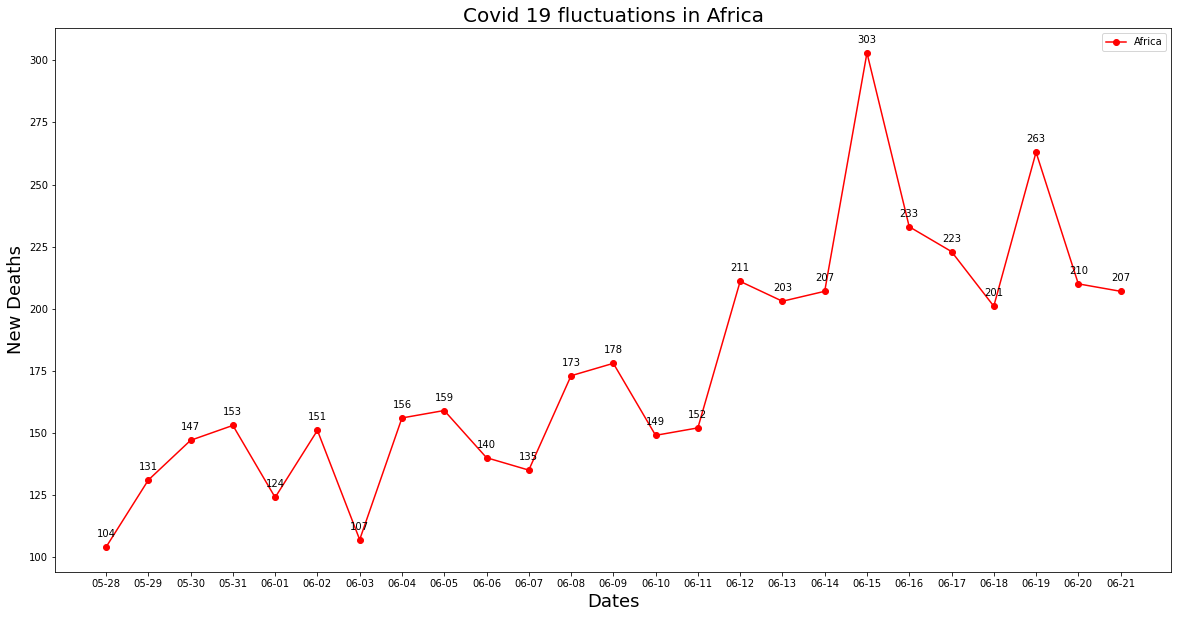

In [392]:
plt.plot(DAY,Area(Africa)[1],'ro-',label='Africa')
plt.title('Covid 19 fluctuations in Africa',fontsize=20)
anotation(DAY,Area(Africa)[1])
plt.legend()
plt.xlabel('Dates',fontsize=18)
plt.ylabel('New Deaths',fontsize=18)
plt.show()

#### Nhận xét:
- Số ca tử vong có nhiều biến động. Tuy nhiên có xu hướng tăng.
- Ngày 15/06 có số ca tử vong tăng đột biến với 303 ca.

## vi. Châu Úc

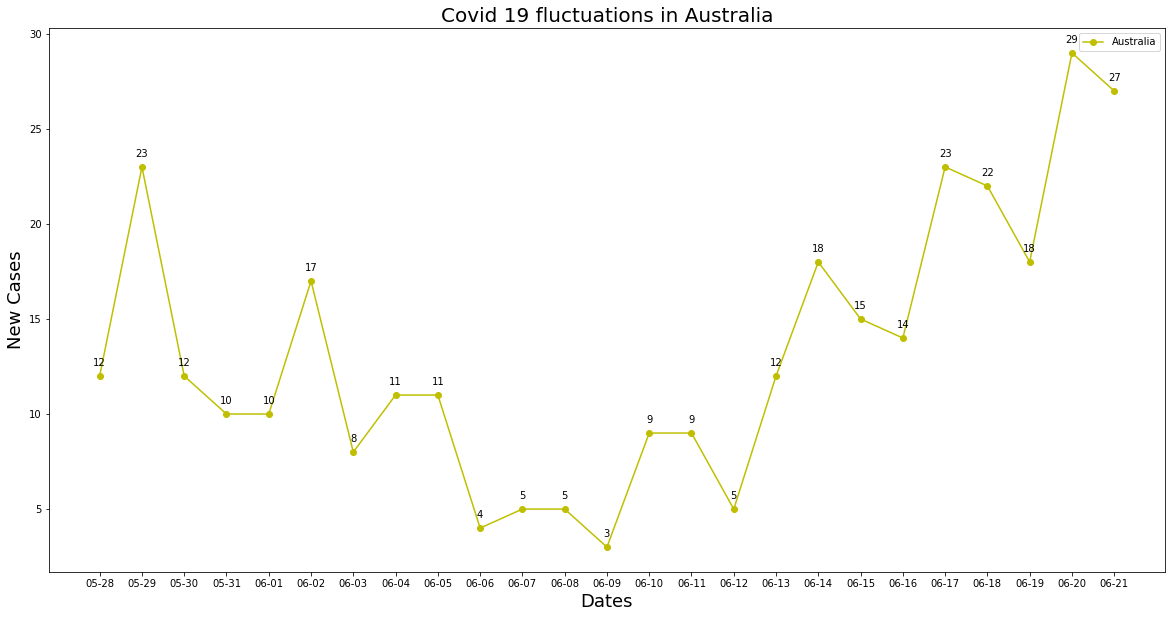

In [393]:
plt.plot(DAY,Area(Australia)[0],'yo-',label='Australia')
plt.title('Covid 19 fluctuations in Australia',fontsize=20)
anotation(DAY,Area(Australia)[0])
plt.legend()
plt.xlabel('Dates',fontsize=18)
plt.ylabel('New Cases',fontsize=18)
plt.show()

#### Nhận xét:
- Số ca nhiễm mới có nhiều biến động. Từ ngày 28/05 đến 09/06 có xu hướng giảm, tuy nhiên từ ngày 09/06 đến 21/06 có xu hướng tăng trở lại.
- Cao nhất vào ngày 20/06 với 29 ca nhiễm mới. Thấp nhất vào ngày 09/06 với 3 ca.

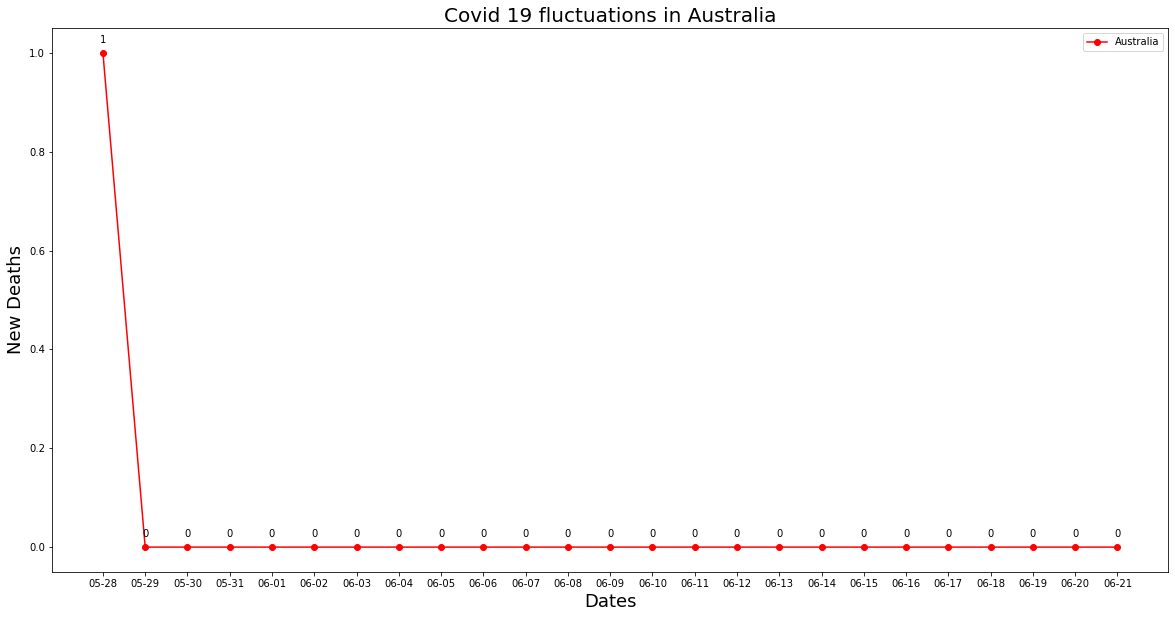

In [394]:
plt.plot(DAY,Area(Australia)[1],'ro-',label='Australia')
plt.title('Covid 19 fluctuations in Australia',fontsize=20)
anotation(DAY,Area(Australia)[1])
plt.legend()
plt.xlabel('Dates',fontsize=18)
plt.ylabel('New Deaths',fontsize=18)
plt.show()

#### Nhận xét:
- Từ ngày 28/05 đến 21/06 chỉ có 1 ca tử vong vào ngày 28/05.

## 4.3 Country

In [395]:
def Name():
    Value = input('country: ')
    return Value

In [396]:
arr=[]
name = Name()
def country(name):
    Frame = pd.DataFrame(arr)
    for i in range(215):
        if (name in df.country[i]):
            for i in sources:
                day= x.get_group(i) # Lấy ra từng ngày
                index=day[day.country==name]
                Frame= Frame.append(index)
            return Frame 
    return []    
if (len(country(name))==0):
    print('Sai du lieu input')
else: 
    df1= country(name)
    print("Waiting !!!")
    export_csv = df1.to_csv (name+'.csv', index = None, header=True) 
    print("Done !")

country: Vietnam
Waiting !!!
Done !


In [397]:
name ='Vietnam'
frame = pd.read_csv(name+'.csv',parse_dates=['Date'],thousands=',',skipinitialspace=True)

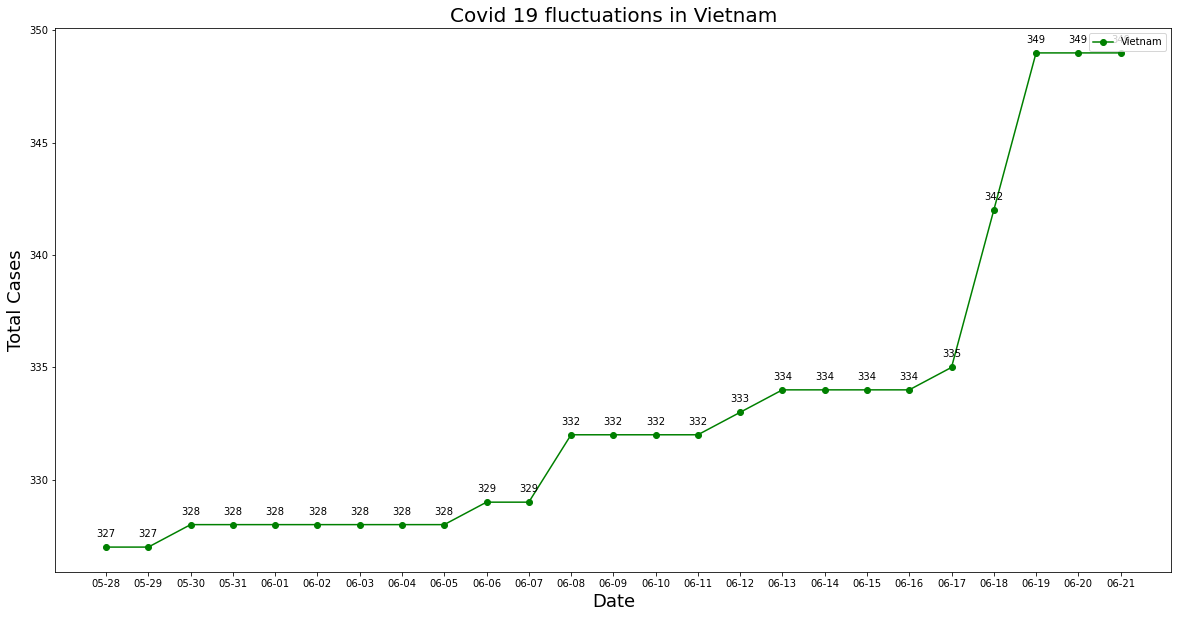

In [398]:
'''
0:new_Cases 1:new_deaths 2:active_cases 3:serious 4:total_cases 5:total_deaths 6:total_recovered

'''

number = 4
if (number==0):
    New_Cases = list(frame['new_cases'])
    plt.ylabel('New Cases',fontsize=18)
    plt.plot(DAY,New_Cases,'go-',label=name)
    anotation(DAY,New_Cases)
elif (number==1):
    New_Deaths = list(frame['new_deaths'])
    plt.ylabel('New Deaths',fontsize=18)
    plt.plot(DAY,New_Deaths,'go-',label=name)
    anotation(DAY,New_Deaths)
elif (number==2):
    Active_Cases = list(frame['active_cases'])
    plt.ylabel('Active Cases',fontsize=18)
    plt.plot(DAY,Active_Cases,'go-',label=name)
    anotation(DAY,Active_Cases)
elif (number==3):
    Serious = list(frame['serious'])
    plt.ylabel('Serious',fontsize=18)
    plt.plot(DAY,Serious,'go-',label=name)
    anotation(DAY,Serious)
elif (number==4):
    Total_Cases = list(frame['total_cases'])
    plt.ylabel('Total Cases',fontsize=18)
    plt.plot(DAY,Total_Cases,'go-',label=name)
    anotation(DAY,Total_Cases)
elif (number==5):
    Total_Deaths = list(frame['total_deaths'])
    plt.ylabel('Total Deaths',fontsize=18)
    plt.plot(DAY,Total_Deaths,'go-',label=name)
    anotation(DAY,Total_Deaths)
elif (number==6):
    Total_Recovered = list(frame['total_recovered'])
    plt.ylabel('Total Recovered',fontsize=18)
    plt.plot(DAY,Total_Recovered,'go-',label=name)
    anotation(DAY,Total_Recovered)   
plt.title('Covid 19 fluctuations in '+ name,fontsize=20)
plt.legend()
plt.xlabel('Date',fontsize=18)
plt.show()

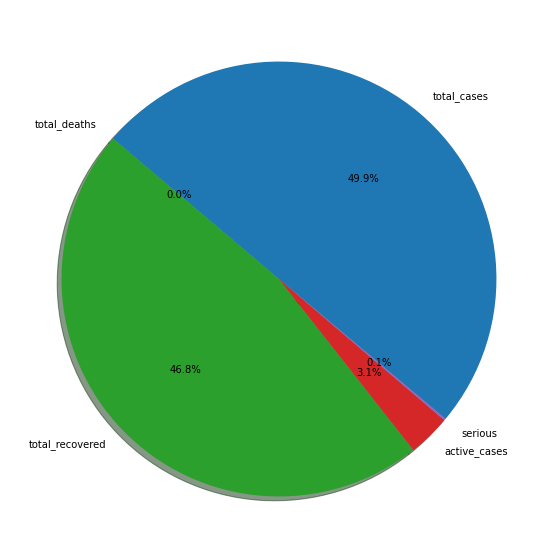

In [399]:
size=[]
size.append(float(frame[frame.Date=='2020-06-21'].total_cases))
size.append(float(frame[frame.Date=='2020-06-21'].total_deaths))
size.append(float(frame[frame.Date=='2020-06-21'].total_recovered))
size.append(float(frame[frame.Date=='2020-06-21'].active_cases))
size.append(float(frame[frame.Date=='2020-06-21'].serious))
Labels=['total_cases','total_deaths','total_recovered','active_cases','serious']
plt.pie(size,labels=Labels,autopct='%1.1f%%', shadow=True, startangle=320)
plt.show()

def Find():
    if (frame.continent[0]=='Asia'):
        return 0
    if (frame.continent[0]=='North America'):
        return 1
    if (frame.continent[0]=='South America'):
        return 2
    if (frame.continent[0]=='Europe'):
        return 3
    if (frame.continent[0]=='Africa'):
        return 4
    if (frame.continent[0]=='Australia/Oceania'):
        return 5

In [400]:
data,continent=[],[]
df1 = df1 = df[df['Date']=='2020-05-28']
df2 = pd.read_csv('Continent.csv',thousands=',',skipinitialspace=True)
data.append(df1.total_cases.sum())
data.append(df1.total_deaths.sum())
data.append(df1.total_recovered.sum())
for i in range(6):   
    if (Find()==i):
        continent.append(float(df2.loc[i].total_cases.mean()))
        continent.append(float(df2.loc[i].total_deaths.mean()))
        continent.append(float(df2.loc[i].total_recovered.mean()))
        if (i==0):
            c=  'Asia'
        if (i==1):
            c=  'North_America'
        if (i==2):
            c=  'South America'
        if (i==3):
            c=  'Europe'
        if (i==4):
            c=  'Africa'
        if (i==5):
            c=  'Australia'

In [401]:
last = {"Ob":[name,c,'World'],"total_cases":[size[0],continent[0],data[0]] ,"total_deaths":[size[1],continent[1],data[1]],"total_recovered":[size[2],continent[2],data[2]]}
df3=pd.DataFrame(last)
df3

,Ob,total_cases,total_deaths,total_recovered
0,Vietnam,349.0,0.0,327.0
1,Asia,131587.0,3814.0,55126.0
2,World,5900907.0,361549.0,2576656.0


#### Ý nghĩa : 
* Dùng để so sánh các số liệu của đất nước muốn tìm kiếm so với châu lục cũng như trên toàn thế giới